In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings;
warnings.filterwarnings('ignore');

In [2]:
data=pd.read_csv('YourCabs.csv')
data.drop(['id'],axis=1,inplace=True)
data.drop(['user_id'],axis=1,inplace=True)
data

,vehicle_model_id,package_id,travel_type_id,from_area_id,to_area_id,from_city_id,to_city_id,from_date,online_booking,mobile_site_booking,booking_created,from_lat,from_long,to_lat,to_long,Car_Cancellation
0,28,NaN,2,83.0,448.0,NaN,NaN,01-01-2013 02:00,0,0,01-01-2013 01:39,12.924150,77.672290,12.927320,77.635750,0
1,12,NaN,2,1010.0,540.0,NaN,NaN,01-01-2013 09:00,0,0,01-01-2013 02:25,12.966910,77.749350,12.927680,77.626640,0
2,12,NaN,2,1301.0,1034.0,NaN,NaN,01-01-2013 03:30,0,0,01-01-2013 03:08,12.937222,77.626915,13.047926,77.597766,0
3,12,NaN,2,768.0,398.0,NaN,NaN,01-01-2013 05:45,0,0,01-01-2013 04:39,12.989990,77.553320,12.971430,77.639140,0
4,12,NaN,2,1365.0,849.0,NaN,NaN,01-01-2013 09:00,0,0,01-01-2013 07:53,12.845653,77.677925,12.954340,77.600720,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43426,12,NaN,2,1147.0,452.0,15.0,NaN,11/24/2013 18:00,1,0,11/24/2013 14:25,13.030640,77.649100,12.952780,77.590880,0
43427,12,NaN,2,393.0,466.0,15.0,NaN,11/26/2013 1:00,1,0,11/24/2013 14:30,13.199560,77.706880,13.017436,77.644580,0
43428,12,1.0,3,974.0,NaN,15.0,NaN,11/24/2013 18:30,0,0,11/24/2013 14:35,13.075570,77.559040,NaN,NaN,0
43429,87,NaN,2,1263.0,542.0,15.0,NaN,11/24/2013 16:00,0,0,11/24/2013 14:43,12.968970,77.594560,12.938230,77.622890,0


In [3]:
unique_id=data['travel_type_id'].unique()

In [4]:
data1=data[data['travel_type_id']==unique_id[0]]
data2=data[data['travel_type_id']==unique_id[1]]
data3=data[data['travel_type_id']==unique_id[2]]

In [5]:
data1.sample(5)

,vehicle_model_id,package_id,travel_type_id,from_area_id,to_area_id,from_city_id,to_city_id,from_date,online_booking,mobile_site_booking,booking_created,from_lat,from_long,to_lat,to_long,Car_Cancellation
29449,12,NaN,2,393.0,1379.0,15.0,NaN,8/23/2013 9:45,0,1,8/23/2013 8:11,13.199560,77.706880,13.062088,77.473672,0
5106,12,NaN,2,182.0,393.0,NaN,NaN,2/22/2013 10:00,1,0,2/21/2013 19:38,12.945740,77.649280,13.199560,77.706880,0
276,12,NaN,2,1044.0,393.0,NaN,NaN,01-05-2013 15:30,1,0,01-04-2013 20:06,12.968887,77.644329,13.199560,77.706880,0
39113,12,NaN,2,156.0,1371.0,15.0,NaN,10/24/2013 13:45,1,0,10/23/2013 13:35,13.026220,77.701430,13.000418,77.674835,0
36458,12,NaN,2,1183.0,393.0,15.0,NaN,10-08-2013 04:15,1,0,10-05-2013 16:10,12.965563,77.668576,13.199560,77.706880,0


In [6]:
data1.isnull().sum()/len(data1)*100

vehicle_model_id         0.000000
package_id             100.000000
travel_type_id           0.000000
from_area_id             0.000000
to_area_id               0.000000
from_city_id            57.704421
to_city_id             100.000000
from_date                0.000000
online_booking           0.000000
mobile_site_booking      0.000000
booking_created          0.000000
from_lat                 0.000000
from_long                0.000000
to_lat                   0.000000
to_long                  0.000000
Car_Cancellation         0.000000
dtype: float64

In [7]:
data1.drop(['vehicle_model_id'],axis=1,inplace=True)
data1.drop(['package_id'],axis=1,inplace=True)
del data1['from_city_id']
del data1['to_city_id']
del data1['travel_type_id']

In [8]:
data1['from_date'] = pd.to_datetime(data1['from_date'], format='mixed')
data1['day'] = data1['from_date'].dt.day
data1['month'] = data1['from_date'].dt.month
data1['weekday'] = data1['from_date'].dt.weekday
data1['time'] = data1['from_date'].dt.time
data1['is_weekend'] = data1['from_date'].dt.weekday >= 5

data1['booking_created'] = pd.to_datetime(data1['booking_created'], format='mixed')
data1['day'] = data1['booking_created'].dt.day
data1['month'] = data1['booking_created'].dt.month
data1['weekday'] = data1['booking_created'].dt.weekday
data1['time'] = data1['booking_created'].dt.time
data1['is_weekend'] = data1['booking_created'].dt.weekday >= 5

data1

,from_area_id,to_area_id,from_date,online_booking,mobile_site_booking,booking_created,from_lat,from_long,to_lat,to_long,Car_Cancellation,day,month,weekday,time,is_weekend
0,83.0,448.0,2013-01-01 02:00:00,0,0,2013-01-01 01:39:00,12.924150,77.672290,12.927320,77.635750,0,1,1,1,01:39:00,False
1,1010.0,540.0,2013-01-01 09:00:00,0,0,2013-01-01 02:25:00,12.966910,77.749350,12.927680,77.626640,0,1,1,1,02:25:00,False
2,1301.0,1034.0,2013-01-01 03:30:00,0,0,2013-01-01 03:08:00,12.937222,77.626915,13.047926,77.597766,0,1,1,1,03:08:00,False
3,768.0,398.0,2013-01-01 05:45:00,0,0,2013-01-01 04:39:00,12.989990,77.553320,12.971430,77.639140,0,1,1,1,04:39:00,False
4,1365.0,849.0,2013-01-01 09:00:00,0,0,2013-01-01 07:53:00,12.845653,77.677925,12.954340,77.600720,0,1,1,1,07:53:00,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43425,585.0,1226.0,2013-11-25 00:00:00,0,1,2013-11-24 14:24:00,12.976770,77.572700,13.015080,77.677960,0,24,11,6,14:24:00,True
43426,1147.0,452.0,2013-11-24 18:00:00,1,0,2013-11-24 14:25:00,13.030640,77.649100,12.952780,77.590880,0,24,11,6,14:25:00,True
43427,393.0,466.0,2013-11-26 01:00:00,1,0,2013-11-24 14:30:00,13.199560,77.706880,13.017436,77.644580,0,24,11,6,14:30:00,True
43429,1263.0,542.0,2013-11-24 16:00:00,0,0,2013-11-24 14:43:00,12.968970,77.594560,12.938230,77.622890,0,24,11,6,14:43:00,True


In [9]:
def haversine(lat1, lon1, lat2, lon2):
    R = 6371
    phi1 = np.radians(lat1)
    phi2 = np.radians(lat2)
    delta_phi = np.radians(lat2 - lat1)
    delta_lambda = np.radians(lon2 - lon1)
    a = np.sin(delta_phi / 2) ** 2 + np.cos(phi1) * np.cos(phi2) * np.sin(delta_lambda / 2) ** 2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))
    distance = R * c
    return distance
data1['distance_km'] = data1.apply(lambda row: haversine(row['from_lat'], row['from_long'], row['to_lat'], row['to_long']), axis=1)
del data1['from_lat']
del data1['from_long']
del data1['to_lat']
del data1['to_long']
data1['time_to_travel'] = (data1['from_date'] - data1['booking_created']).dt.total_seconds() / 3600
del data1['from_date']
del data1['booking_created']
data1

,from_area_id,to_area_id,online_booking,mobile_site_booking,Car_Cancellation,day,month,weekday,time,is_weekend,distance_km,time_to_travel
0,83.0,448.0,0,0,0,1,1,1,01:39:00,False,3.975764,0.350000
1,1010.0,540.0,0,0,0,1,1,1,02:25:00,False,13.995033,6.583333
2,1301.0,1034.0,0,0,0,1,1,1,03:08:00,False,12.708414,0.366667
3,768.0,398.0,0,0,0,1,1,1,04:39:00,False,9.525153,1.100000
4,1365.0,849.0,0,0,0,1,1,1,07:53:00,False,14.699782,1.116667
...,...,...,...,...,...,...,...,...,...,...,...,...
43425,585.0,1226.0,0,1,0,24,11,6,14:24:00,True,12.174196,9.600000
43426,1147.0,452.0,1,0,0,24,11,6,14:25:00,True,10.711968,3.583333
43427,393.0,466.0,1,0,0,24,11,6,14:30:00,True,21.345603,34.500000
43429,1263.0,542.0,0,0,0,24,11,6,14:43:00,True,4.594393,1.283333


In [10]:

data1['time'] = data1['time'].astype(str)

data1[['hours', 'minutes', 'seconds']] = data1['time'].str.split(':', expand=True)

data1[['hours', 'minutes', 'seconds']] = data1[['hours', 'minutes', 'seconds']].astype(int)

del data1['time']
del data1['seconds']

data1

,from_area_id,to_area_id,online_booking,mobile_site_booking,Car_Cancellation,day,month,weekday,is_weekend,distance_km,time_to_travel,hours,minutes
0,83.0,448.0,0,0,0,1,1,1,False,3.975764,0.350000,1,39
1,1010.0,540.0,0,0,0,1,1,1,False,13.995033,6.583333,2,25
2,1301.0,1034.0,0,0,0,1,1,1,False,12.708414,0.366667,3,8
3,768.0,398.0,0,0,0,1,1,1,False,9.525153,1.100000,4,39
4,1365.0,849.0,0,0,0,1,1,1,False,14.699782,1.116667,7,53
...,...,...,...,...,...,...,...,...,...,...,...,...,...
43425,585.0,1226.0,0,1,0,24,11,6,True,12.174196,9.600000,14,24
43426,1147.0,452.0,1,0,0,24,11,6,True,10.711968,3.583333,14,25
43427,393.0,466.0,1,0,0,24,11,6,True,21.345603,34.500000,14,30
43429,1263.0,542.0,0,0,0,24,11,6,True,4.594393,1.283333,14,43


In [11]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data1['is_weekend'] = le.fit_transform(data1['is_weekend'])


In [12]:
data1.nunique()

from_area_id            586
to_area_id              567
online_booking            2
mobile_site_booking       2
Car_Cancellation          2
day                      31
month                    11
weekday                   7
is_weekend                2
distance_km            7890
time_to_travel         6386
hours                    24
minutes                  60
dtype: int64

In [13]:
data1.describe()

,from_area_id,to_area_id,online_booking,mobile_site_booking,Car_Cancellation,day,month,weekday,is_weekend,distance_km,time_to_travel,hours,minutes
count,34292.000000,34292.000000,34292.000000,34292.000000,34292.000000,34292.000000,34292.000000,34292.000000,34292.000000,34292.000000,34292.000000,34292.000000,34292.000000
mean,713.991660,669.478946,0.363058,0.048087,0.080923,15.757465,6.398548,3.077919,0.278666,17.378964,37.202130,14.466931,29.451155
std,419.665427,400.637933,0.480889,0.213953,0.272720,9.002409,2.915189,1.944821,0.448349,10.463727,100.917727,5.360144,17.143556
min,2.000000,2.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,-22.900000,0.000000,0.000000
25%,393.000000,393.000000,0.000000,0.000000,0.000000,8.000000,4.000000,1.000000,0.000000,8.569049,3.183333,11.000000,15.000000
50%,590.000000,541.000000,0.000000,0.000000,0.000000,15.500000,7.000000,3.000000,0.000000,14.675534,8.833333,15.000000,29.000000
75%,1089.000000,1054.000000,1.000000,0.000000,0.000000,23.000000,9.000000,5.000000,1.000000,26.283357,19.166667,19.000000,44.000000
max,1403.000000,1403.000000,1.000000,1.000000,1.000000,31.000000,11.000000,6.000000,1.000000,59.841842,1906.900000,23.000000,59.000000


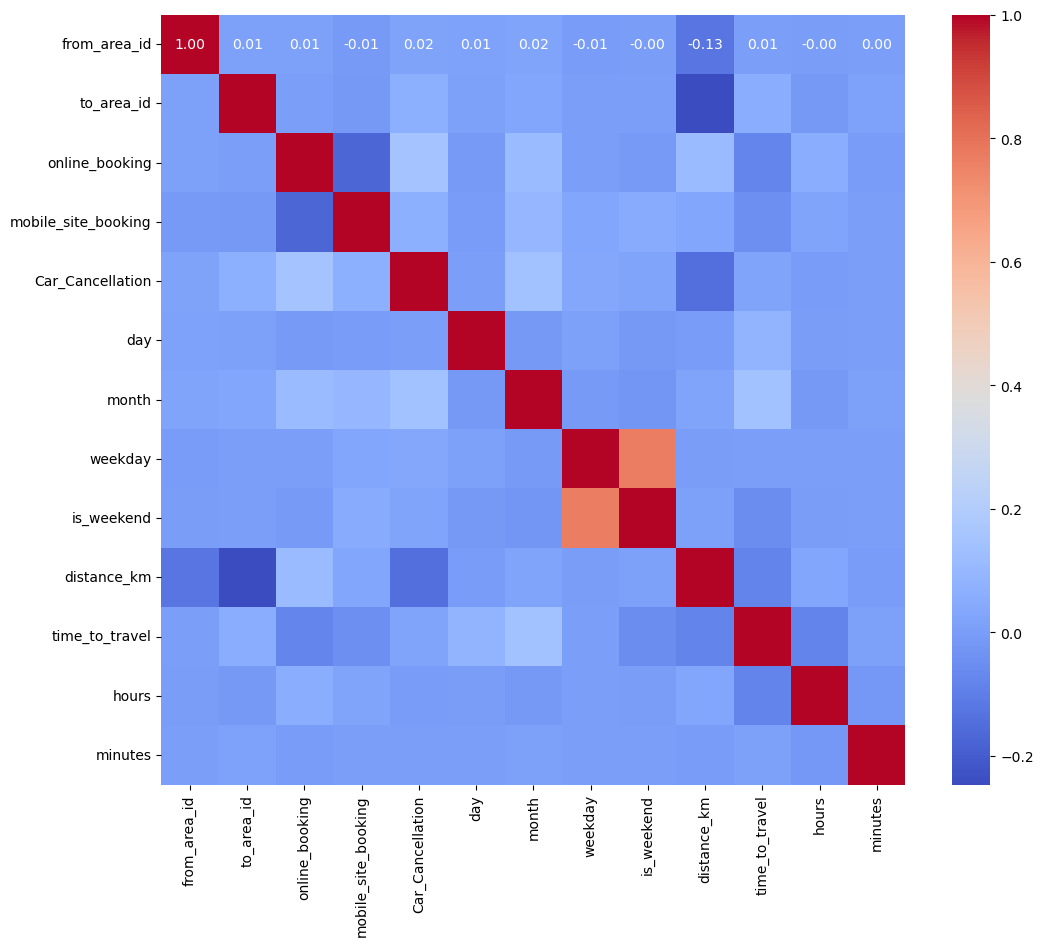

In [14]:
plt.figure(figsize=(12, 10))
sns.heatmap(data1.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.show()

In [15]:
data1.describe(include='all')

,from_area_id,to_area_id,online_booking,mobile_site_booking,Car_Cancellation,day,month,weekday,is_weekend,distance_km,time_to_travel,hours,minutes
count,34292.000000,34292.000000,34292.000000,34292.000000,34292.000000,34292.000000,34292.000000,34292.000000,34292.000000,34292.000000,34292.000000,34292.000000,34292.000000
mean,713.991660,669.478946,0.363058,0.048087,0.080923,15.757465,6.398548,3.077919,0.278666,17.378964,37.202130,14.466931,29.451155
std,419.665427,400.637933,0.480889,0.213953,0.272720,9.002409,2.915189,1.944821,0.448349,10.463727,100.917727,5.360144,17.143556
min,2.000000,2.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,-22.900000,0.000000,0.000000
25%,393.000000,393.000000,0.000000,0.000000,0.000000,8.000000,4.000000,1.000000,0.000000,8.569049,3.183333,11.000000,15.000000
50%,590.000000,541.000000,0.000000,0.000000,0.000000,15.500000,7.000000,3.000000,0.000000,14.675534,8.833333,15.000000,29.000000
75%,1089.000000,1054.000000,1.000000,0.000000,0.000000,23.000000,9.000000,5.000000,1.000000,26.283357,19.166667,19.000000,44.000000
max,1403.000000,1403.000000,1.000000,1.000000,1.000000,31.000000,11.000000,6.000000,1.000000,59.841842,1906.900000,23.000000,59.000000


In [16]:
data1.isnull().sum()/len(data1)*100

from_area_id           0.0
to_area_id             0.0
online_booking         0.0
mobile_site_booking    0.0
Car_Cancellation       0.0
day                    0.0
month                  0.0
weekday                0.0
is_weekend             0.0
distance_km            0.0
time_to_travel         0.0
hours                  0.0
minutes                0.0
dtype: float64

In [17]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 34292 entries, 0 to 43430
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   from_area_id         34292 non-null  float64
 1   to_area_id           34292 non-null  float64
 2   online_booking       34292 non-null  int64  
 3   mobile_site_booking  34292 non-null  int64  
 4   Car_Cancellation     34292 non-null  int64  
 5   day                  34292 non-null  int32  
 6   month                34292 non-null  int32  
 7   weekday              34292 non-null  int32  
 8   is_weekend           34292 non-null  int64  
 9   distance_km          34292 non-null  float64
 10  time_to_travel       34292 non-null  float64
 11  hours                34292 non-null  int32  
 12  minutes              34292 non-null  int32  
dtypes: float64(4), int32(5), int64(4)
memory usage: 3.0 MB


In [18]:
data1.corr()

,from_area_id,to_area_id,online_booking,mobile_site_booking,Car_Cancellation,day,month,weekday,is_weekend,distance_km,time_to_travel,hours,minutes
from_area_id,1.000000,0.007354,0.008667,-0.008263,0.018126,0.012253,0.022467,-0.005691,-0.001434,-0.126365,0.005348,-0.002216,0.004408
to_area_id,0.007354,1.000000,0.004162,-0.014732,0.066097,0.011103,0.026976,0.002014,0.002618,-0.246550,0.058427,-0.015198,0.012352
online_booking,0.008667,0.004162,1.000000,-0.169689,0.151097,-0.011044,0.113207,0.001930,-0.011955,0.111530,-0.079637,0.057583,-0.005921
mobile_site_booking,-0.008263,-0.014732,-0.169689,1.000000,0.068250,-0.003196,0.097803,0.028770,0.046355,0.030978,-0.049503,0.023192,0.002012
Car_Cancellation,0.018126,0.066097,0.151097,0.068250,1.000000,0.004467,0.142982,0.034132,0.021394,-0.147075,0.022161,-0.004523,0.006088
day,0.012253,0.011103,-0.011044,-0.003196,0.004467,1.000000,-0.015069,0.007755,-0.016866,-0.007766,0.082065,-0.002272,0.006017
month,0.022467,0.026976,0.113207,0.097803,0.142982,-0.015069,1.000000,-0.010575,-0.025871,0.023862,0.139580,-0.015377,0.011367
weekday,-0.005691,0.002014,0.001930,0.028770,0.034132,0.007755,-0.010575,1.000000,0.768801,0.001721,0.004596,0.002432,0.002719
is_weekend,-0.001434,0.002618,-0.011955,0.046355,0.021394,-0.016866,-0.025871,0.768801,1.000000,0.008491,-0.055709,0.000255,0.004764
distance_km,-0.126365,-0.246550,0.111530,0.030978,-0.147075,-0.007766,0.023862,0.001721,0.008491,1.000000,-0.081612,0.027608,-0.003317


In [19]:
data1

,from_area_id,to_area_id,online_booking,mobile_site_booking,Car_Cancellation,day,month,weekday,is_weekend,distance_km,time_to_travel,hours,minutes
0,83.0,448.0,0,0,0,1,1,1,0,3.975764,0.350000,1,39
1,1010.0,540.0,0,0,0,1,1,1,0,13.995033,6.583333,2,25
2,1301.0,1034.0,0,0,0,1,1,1,0,12.708414,0.366667,3,8
3,768.0,398.0,0,0,0,1,1,1,0,9.525153,1.100000,4,39
4,1365.0,849.0,0,0,0,1,1,1,0,14.699782,1.116667,7,53
...,...,...,...,...,...,...,...,...,...,...,...,...,...
43425,585.0,1226.0,0,1,0,24,11,6,1,12.174196,9.600000,14,24
43426,1147.0,452.0,1,0,0,24,11,6,1,10.711968,3.583333,14,25
43427,393.0,466.0,1,0,0,24,11,6,1,21.345603,34.500000,14,30
43429,1263.0,542.0,0,0,0,24,11,6,1,4.594393,1.283333,14,43


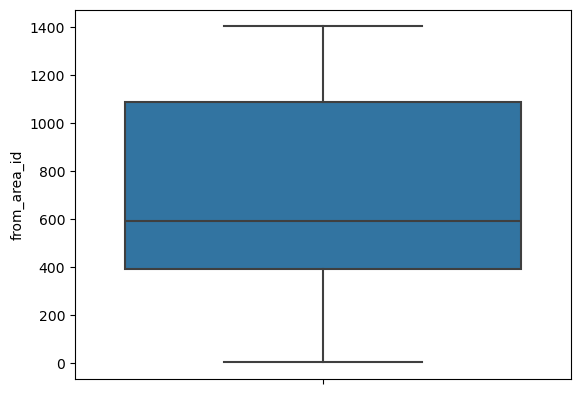

PathPatch6((-0.4, 393) ...)


In [20]:
ax=sns.boxplot(y='from_area_id',data=data1)
plt.show()
for patch in ax.patches:
    print(patch)

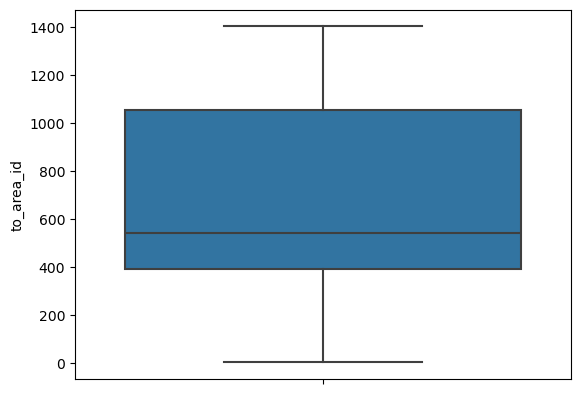

PathPatch6((-0.4, 393) ...)


In [21]:
ax=sns.boxplot(y='to_area_id',data=data1)
plt.show()
for patch in ax.patches:
    print(patch)

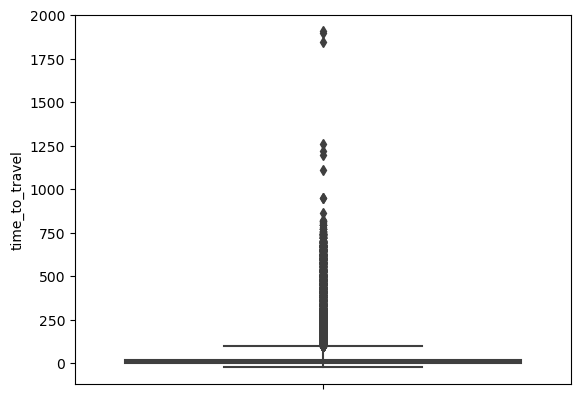

PathPatch6((-0.4, 3.18333) ...)


In [22]:
ax=sns.boxplot(y='time_to_travel',data=data1,whis=5)
plt.show()
for patch in ax.patches:
    print(patch)

In [23]:
f1_T = data1['time_to_travel'].sort_values(ascending=True)
q1_T = f1_T.quantile(.25)
q3_T = f1_T.quantile(.75)
iqr_T = q3_T - q1_T
UB_T = q3_T + (iqr_T * 1.5)
LB_T = q1_T - (iqr_T* 1.5)
data1['time_to_travel'].clip(lower=LB_T,upper=UB_T,inplace=True)

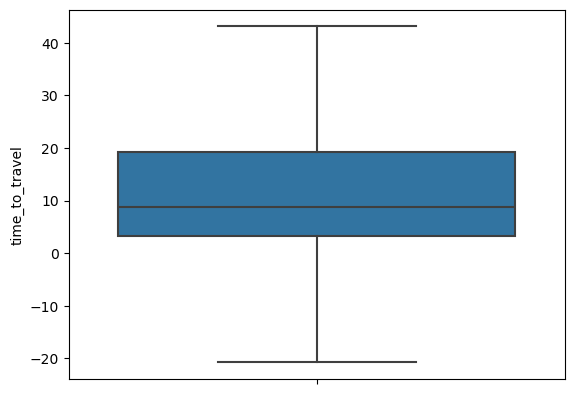

PathPatch6((-0.4, 3.18333) ...)


In [24]:
ax=sns.boxplot(y='time_to_travel',data=data1,whis=7)
plt.show()
for patch in ax.patches:
    print(patch)

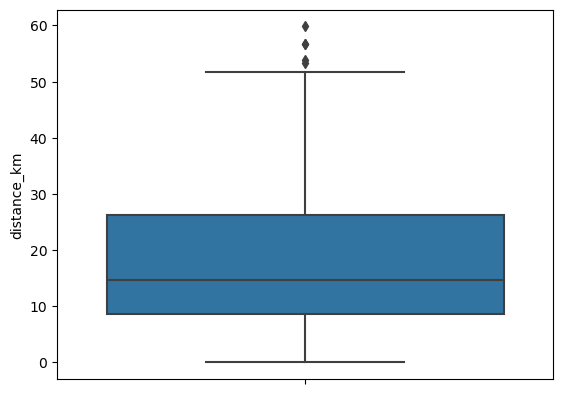

PathPatch6((-0.4, 8.56905) ...)


In [25]:
ax=sns.boxplot(y='distance_km',data=data1)
plt.show()
for patch in ax.patches:
    print(patch)

In [26]:
f1 = data1['distance_km'].sort_values(ascending=True)
q1 = f1.quantile(.25)
q3 = f1.quantile(.75)
iqr = q3 - q1
UB = q3 + (iqr * 1.5)
LB = q1 - (iqr * 1.5)
data1['distance_km'].clip(lower=LB,upper=UB,inplace=True)

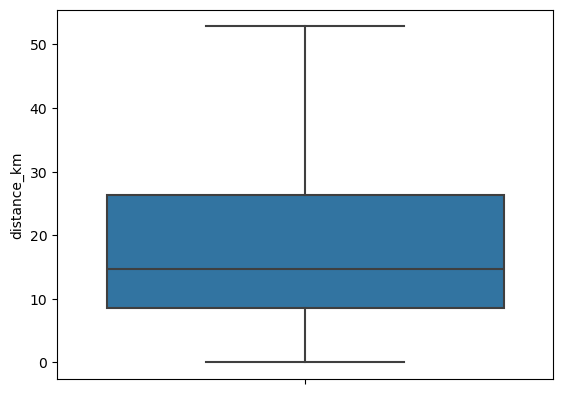

PathPatch6((-0.4, 8.56905) ...)


In [27]:
ax=sns.boxplot(y='distance_km',data=data1)
plt.show()
for patch in ax.patches:
    print(patch)

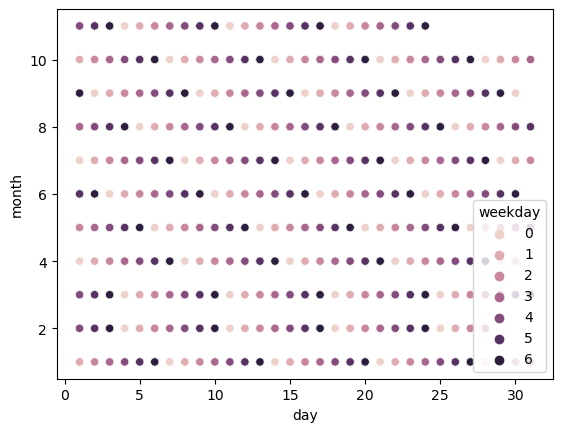

In [28]:
sns.scatterplot(x=data1['day'],y= data1['month'],hue=data1['weekday'])
plt.show()

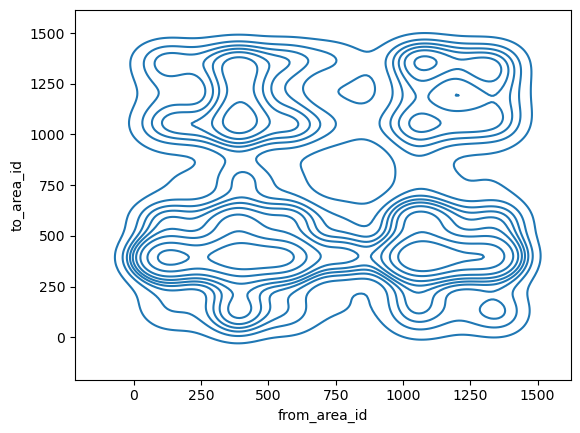

In [29]:
sns.kdeplot(x='from_area_id',y='to_area_id', data=data1)
plt.show()

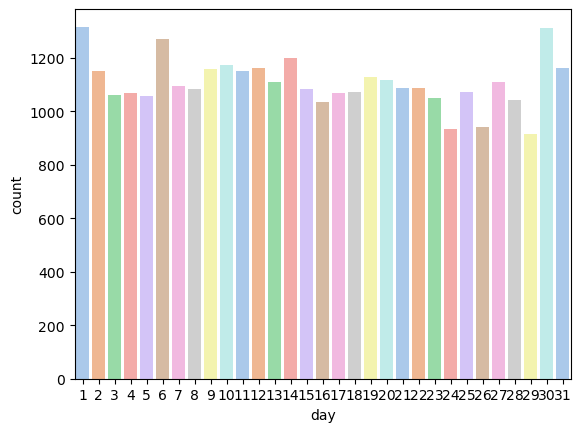

In [30]:
sns.countplot(x='day', data=data1, palette='pastel')
plt.show()

In [31]:
car_cancellation_counts = data1['Car_Cancellation'].value_counts()
print(car_cancellation_counts)

Car_Cancellation
0    31517
1     2775
Name: count, dtype: int64


In [32]:
X = data1.drop(columns=['Car_Cancellation'])
Y = data1['Car_Cancellation']

In [33]:
#data balancing under sampling
X_majority = X[Y == 0]
X_minority = X[Y == 1]
Y_majority = Y[Y == 0]
Y_minority = Y[Y == 1]
X_majority_under = X_majority.sample(len(X_minority), random_state=42)
Y_majority_under = Y_majority.sample(len(X_minority), random_state=42)
X_balanced = pd.concat([X_majority_under, X_minority])
Y_balanced = pd.concat([Y_majority_under, Y_minority])
data1_balanced = pd.concat([X_balanced, Y_balanced], axis=1).sample(frac=1, random_state=42).reset_index(drop=True)
print(data1_balanced['Car_Cancellation'].value_counts())
data1_balanced

Car_Cancellation
0    2775
1    2775
Name: count, dtype: int64


,from_area_id,to_area_id,online_booking,mobile_site_booking,day,month,weekday,is_weekend,distance_km,time_to_travel,hours,minutes,Car_Cancellation
0,296.0,393.0,1,0,22,2,4,0,28.429475,8.833333,18,25,0
1,271.0,1330.0,1,0,4,11,0,0,7.132656,6.183333,16,19,1
2,112.0,393.0,0,0,9,9,0,0,33.274181,13.866667,17,38,1
3,963.0,393.0,0,0,22,4,0,0,26.304733,2.816667,19,56,0
4,1165.0,977.0,1,0,23,5,3,0,16.830583,1.633333,14,7,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5545,1099.0,1384.0,0,0,29,6,5,1,10.232235,2.566667,18,41,1
5546,1159.0,192.0,1,0,1,11,4,0,21.279148,1.583333,19,55,1
5547,572.0,1186.0,1,0,5,11,1,0,10.254839,5.583333,0,55,1
5548,393.0,1096.0,1,0,13,11,2,0,26.095562,4.300000,7,27,1


In [34]:
x = data1_balanced.drop(columns=['Car_Cancellation'])
y = data1_balanced['Car_Cancellation']

In [35]:
from sklearn.metrics import roc_curve, auc, confusion_matrix, accuracy_score, classification_report, r2_score
from sklearn.model_selection import KFold, cross_val_score, train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [36]:
#Decicion Tree

In [37]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=25)

In [38]:
model_dt = DecisionTreeClassifier(random_state=1,max_depth=6)

model_dt.fit(x_train,y_train)

model_dt_score_train = model_dt.score(x_train,y_train)

model_dt_score_test = model_dt.score(x_test,y_test)

print('Training Score',model_dt_score_train)

print('Testing Score',model_dt_score_test)

Training Score 0.7966216216216216
Testing Score 0.7774774774774775


In [39]:

model_dt_ = DecisionTreeClassifier(random_state=1,max_depth=8,criterion='entropy')

model_dt_.fit(x_train,y_train)

model_dt_score_train = model_dt_.score(x_train,y_train)

model_dt_score_test = model_dt_.score(x_test,y_test)

print('Training Score',model_dt_score_train)

print('Testing Score',model_dt_score_test)

Training Score 0.829954954954955
Testing Score 0.7621621621621621


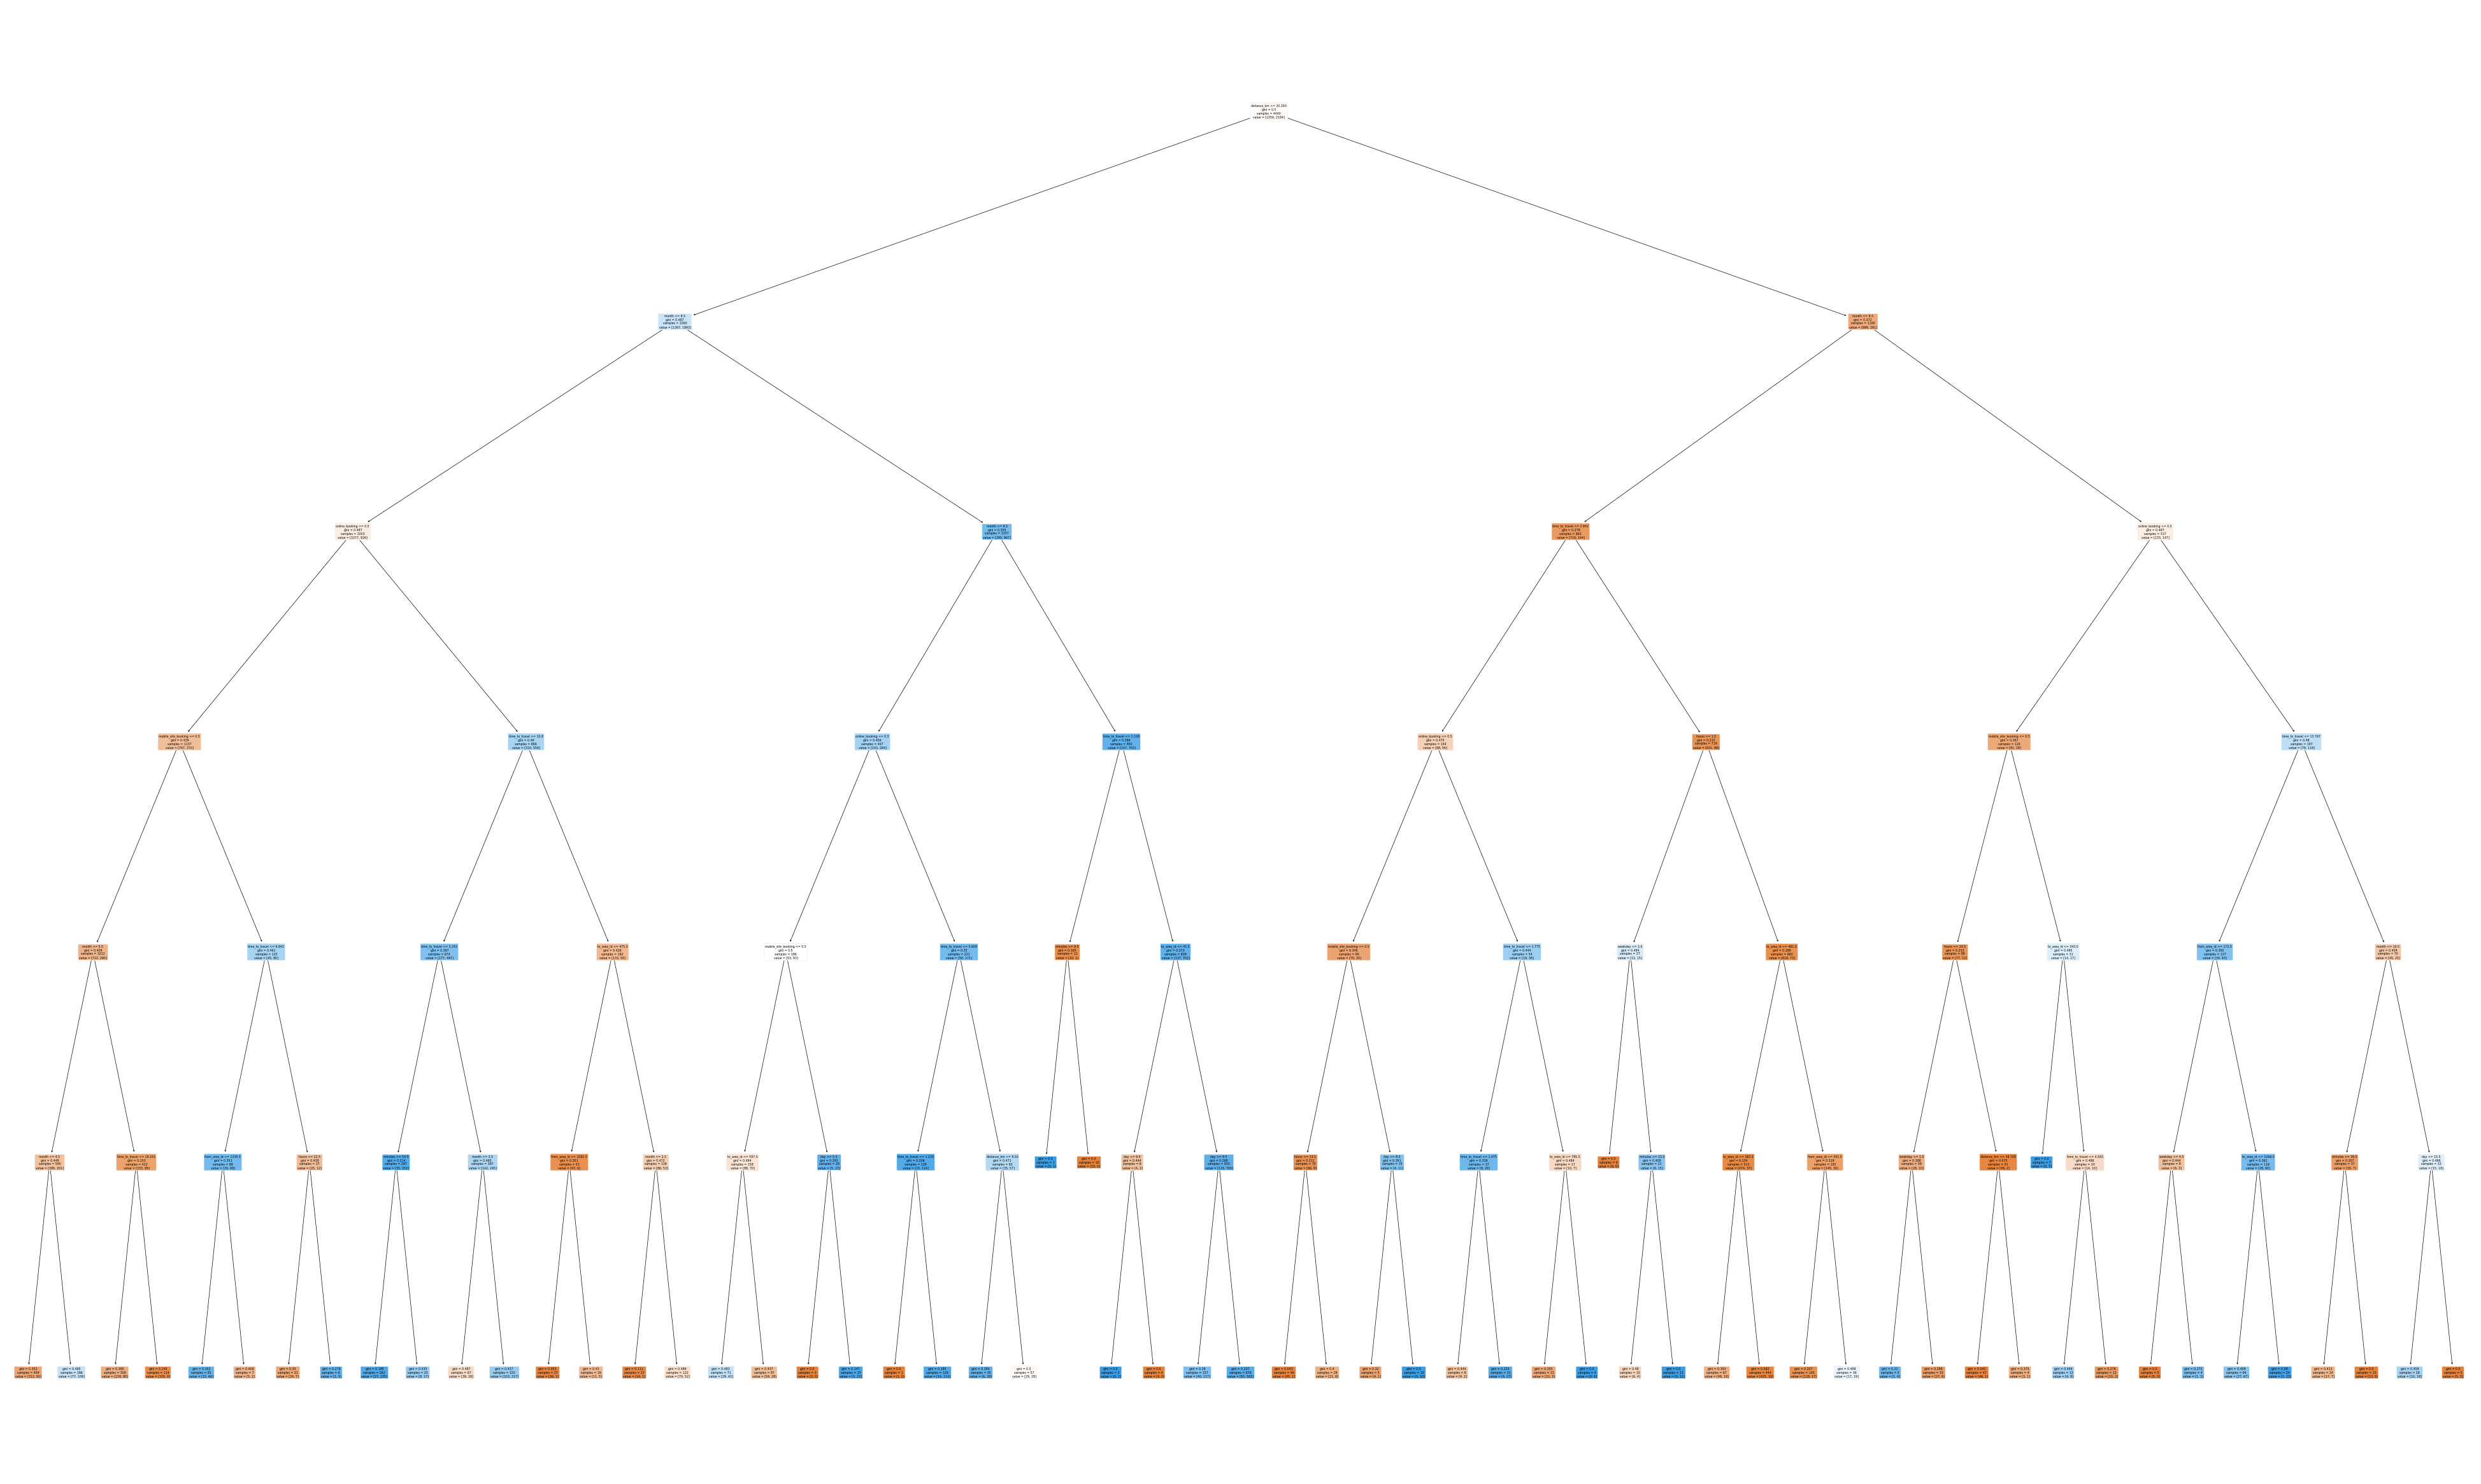

In [40]:
plt.figure(figsize=(50,30))  # Adjust size for better readability
plot_tree(model_dt, feature_names=data1_balanced.columns,filled=True, rounded=True)
plt.show()

In [41]:
y_pred_dt = model_dt.predict_proba(x_test)[:,1]
fpr_dt,tpr_dt,_ = roc_curve(y_test,y_pred_dt)
roc_auc_dt = auc(fpr_dt,tpr_dt)

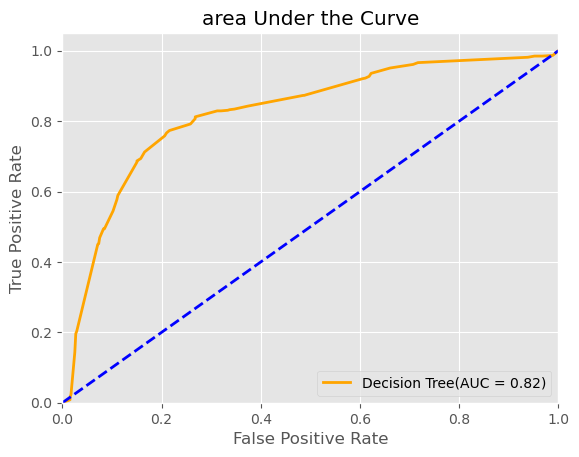

In [42]:

plt.figure(1)
lw=2
plt.plot(fpr_dt,tpr_dt,color='orange',lw=lw,label='Decision Tree(AUC = %0.2f)'%roc_auc_dt)
plt.plot([0,1],[0,1],color='blue',lw=lw,linestyle='--')

plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("area Under the Curve")
# plt.legend(loc="upper left")
plt.legend(loc="lower right")

In [43]:
predictions = model_dt.predict(x_test)
print(confusion_matrix(y_test,predictions))

[[410 109]
 [138 453]]


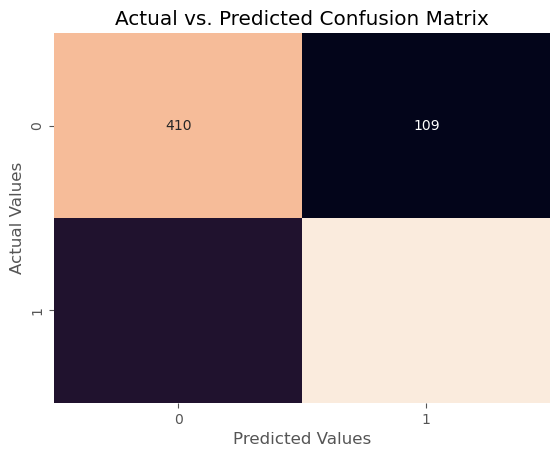

In [44]:
sns.heatmap(confusion_matrix(y_test,predictions), annot=True, fmt='d', cbar=False)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Actual vs. Predicted Confusion Matrix')
plt.show()

In [45]:
accuracy_score(y_test,predictions)

0.7774774774774775

In [46]:
#KNN
knn = KNeighborsClassifier(n_neighbors=3)
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=25)
knn.fit(x_train,y_train)
pred = knn.predict(x_test)

In [47]:
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

[[346 173]
 [212 379]]
              precision    recall  f1-score   support

           0       0.62      0.67      0.64       519
           1       0.69      0.64      0.66       591

    accuracy                           0.65      1110
   macro avg       0.65      0.65      0.65      1110
weighted avg       0.66      0.65      0.65      1110



In [48]:
accuracy_rate = []
error_rate = []
# May take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    score=cross_val_score(knn,x,data1_balanced['Car_Cancellation'],cv=10)
    accuracy_rate.append(score.mean())
    error_rate.append(1-score.mean())

Text(0, 0.5, 'Accuracy Rate')

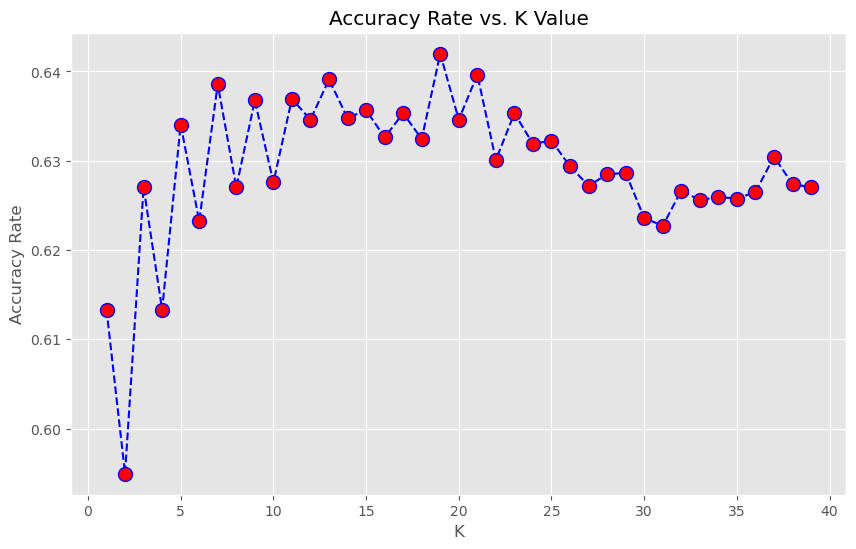

In [49]:
plt.figure(figsize=(10,6))
# plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
#         markerfacecolor='red', markersize=10)
# plt.title('Error Rate vs. K Value')
# plt.xlabel('K')
# plt.ylabel('Error Rate')

plt.plot(range(1,40),accuracy_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Accuracy Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy Rate')

In [50]:
knn = KNeighborsClassifier(n_neighbors=10)

knn.fit(x_train,y_train)
pred = knn.predict(x_test)

print('WITH K=10')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=10


[[349 170]
 [265 326]]


              precision    recall  f1-score   support

           0       0.57      0.67      0.62       519
           1       0.66      0.55      0.60       591

    accuracy                           0.61      1110
   macro avg       0.61      0.61      0.61      1110
weighted avg       0.62      0.61      0.61      1110



In [51]:
knn = KNeighborsClassifier(n_neighbors=30)

knn.fit(x_train,y_train)
pred = knn.predict(x_test)

print('WITH K=30')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=30


[[327 192]
 [232 359]]


              precision    recall  f1-score   support

           0       0.58      0.63      0.61       519
           1       0.65      0.61      0.63       591

    accuracy                           0.62      1110
   macro avg       0.62      0.62      0.62      1110
weighted avg       0.62      0.62      0.62      1110



In [52]:
#naive bayes

In [53]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=25)

In [54]:
model = GaussianNB()

model.fit(xtrain, ytrain)
pred = model.predict(xtest)
print(pred[:150])

[0 0 0 1 0 1 0 1 1 1 1 0 1 1 0 1 1 0 1 1 1 0 0 1 1 1 0 1 0 1 0 1 0 0 0 1 0
 1 1 1 1 1 0 1 1 1 0 1 0 1 0 0 1 0 1 0 0 0 1 1 0 1 1 0 0 0 0 1 1 0 1 1 1 1
 0 1 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 0 1 0 0 1 1 0 1 1 0 0 0 0 0 0 0 1 0 0 1
 0 1 0 0 0 0 0 1 0 1 0 0 1 1 1 1 0 0 0 0 1 1 0 1 1 1 1 1 1 0 1 0 1 0 0 0 0
 1 0]


[]

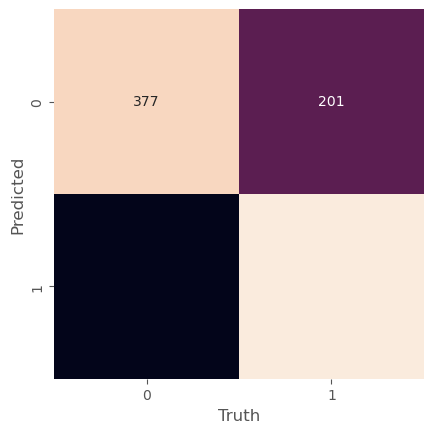

In [55]:
mat = confusion_matrix(pred, ytest)
names = np.unique(pred)
sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=names, yticklabels=names)
plt.xlabel('Truth')
plt.ylabel('Predicted')
plt.plot()

In [56]:
y_pred = pred
y_act = ytest
print(metrics.confusion_matrix(pred,ytest))
print(metrics.classification_report(pred, ytest))

[[377 201]
 [142 390]]
              precision    recall  f1-score   support

           0       0.73      0.65      0.69       578
           1       0.66      0.73      0.69       532

    accuracy                           0.69      1110
   macro avg       0.69      0.69      0.69      1110
weighted avg       0.69      0.69      0.69      1110



In [57]:
#LOGISTICS REGRESSION

In [58]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=25)
standard_Scaler=StandardScaler()
x_train = standard_Scaler.fit_transform(x_train)
x_test = standard_Scaler.transform(x_test)
log_reg=LogisticRegression(random_state=0)
log_reg.fit(x_train,y_train)

LogisticRegression(random_state=0)

In [59]:
y_pred=log_reg.predict(x_test)
conf_matrix = confusion_matrix(y_test,y_pred)

Accuracy:  0.7081081081081081
Precision:  0.7405405405405405
Recall:  0.6954314720812182


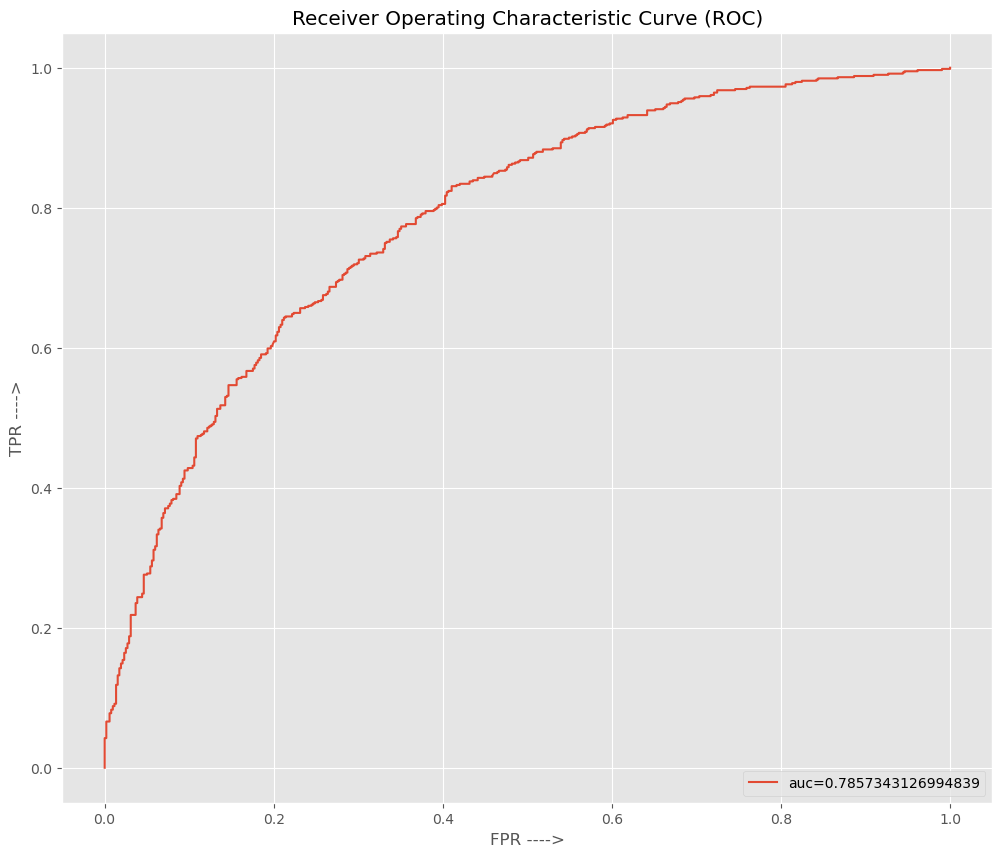

In [60]:
print("Accuracy: ", metrics.accuracy_score(y_test,y_pred))
print("Precision: ", metrics.precision_score(y_test,y_pred))
print("Recall: ", metrics.recall_score(y_test,y_pred))
y_pred_proba = log_reg.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.figure(figsize=(12,10))
plt.plot(fpr,tpr,label="auc="+str(auc))
plt.legend(loc=4)
plt.title("Receiver Operating Characteristic Curve (ROC)")
plt.xlabel("FPR ---->")
plt.ylabel("TPR ---->")
plt.show()

In [61]:
#for data2

In [62]:
data2=data[data['travel_type_id']==unique_id[1]]
data2.nunique()

vehicle_model_id         18
package_id                0
travel_type_id            1
from_area_id            297
to_area_id                1
from_city_id              3
to_city_id              116
from_date              1288
online_booking            2
mobile_site_booking       2
booking_created        1586
from_lat                249
from_long               249
to_lat                    1
to_long                   1
Car_Cancellation          2
dtype: int64

In [63]:
data2.isnull().sum()/len(data2)*100

vehicle_model_id         0.000000
package_id             100.000000
travel_type_id           0.000000
from_area_id             5.538074
to_area_id              99.937067
from_city_id            12.334802
to_city_id               0.062933
from_date                0.000000
online_booking           0.000000
mobile_site_booking      0.000000
booking_created          0.000000
from_lat                 5.852738
from_long                5.852738
to_lat                  99.937067
to_long                 99.937067
Car_Cancellation         0.000000
dtype: float64

In [64]:
data2.drop('package_id', inplace=True,axis=1)
data2.drop('travel_type_id', inplace=True,axis=1)
data2.drop('to_area_id', inplace=True,axis=1)
data2.drop('to_lat', inplace=True,axis=1)
data2.drop('to_long', inplace=True,axis=1)

In [65]:
data2.describe()

,vehicle_model_id,from_area_id,from_city_id,to_city_id,online_booking,mobile_site_booking,from_lat,from_long,Car_Cancellation
count,1589.000000,1501.000000,1393.000000,1588.000000,1589.000000,1589.000000,1496.000000,1496.000000,1589.000000
mean,41.752675,655.097268,14.003589,68.537783,0.427313,0.018880,12.998396,77.650680,0.013216
std,31.175903,401.030823,3.877523,49.880732,0.494844,0.136143,0.101514,0.056213,0.114234
min,10.000000,2.000000,1.000000,4.000000,0.000000,0.000000,12.780910,77.400913,0.000000
25%,12.000000,393.000000,15.000000,32.000000,0.000000,0.000000,12.930220,77.609230,0.000000
50%,24.000000,571.000000,15.000000,49.000000,0.000000,0.000000,12.969368,77.655300,0.000000
75%,65.000000,1063.000000,15.000000,108.000000,1.000000,0.000000,13.018540,77.706880,0.000000
max,90.000000,1398.000000,31.000000,203.000000,1.000000,1.000000,13.243730,77.786420,1.000000


In [66]:
data2.describe(include='all')

,vehicle_model_id,from_area_id,from_city_id,to_city_id,from_date,online_booking,mobile_site_booking,booking_created,from_lat,from_long,Car_Cancellation
count,1589.000000,1501.000000,1393.000000,1588.000000,1589,1589.000000,1589.000000,1589,1496.000000,1496.000000,1589.000000
unique,NaN,NaN,NaN,NaN,1288,NaN,NaN,1586,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,10-12-2013 06:00,NaN,NaN,4/26/2013 22:14,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,14,NaN,NaN,2,NaN,NaN,NaN
mean,41.752675,655.097268,14.003589,68.537783,NaN,0.427313,0.018880,NaN,12.998396,77.650680,0.013216
std,31.175903,401.030823,3.877523,49.880732,NaN,0.494844,0.136143,NaN,0.101514,0.056213,0.114234
min,10.000000,2.000000,1.000000,4.000000,NaN,0.000000,0.000000,NaN,12.780910,77.400913,0.000000
25%,12.000000,393.000000,15.000000,32.000000,NaN,0.000000,0.000000,NaN,12.930220,77.609230,0.000000
50%,24.000000,571.000000,15.000000,49.000000,NaN,0.000000,0.000000,NaN,12.969368,77.655300,0.000000
75%,65.000000,1063.000000,15.000000,108.000000,NaN,1.000000,0.000000,NaN,13.018540,77.706880,0.000000


In [67]:
data2.isnull().sum()/len(data2)*100

vehicle_model_id        0.000000
from_area_id            5.538074
from_city_id           12.334802
to_city_id              0.062933
from_date               0.000000
online_booking          0.000000
mobile_site_booking     0.000000
booking_created         0.000000
from_lat                5.852738
from_long               5.852738
Car_Cancellation        0.000000
dtype: float64

In [68]:
data2['from_area_id'].median()

571.0

In [69]:
data2['from_city_id'].median()

15.0

In [70]:
data2['from_lat'].median()

12.969368

In [71]:
data2['from_long'].median()

77.6553

In [72]:
data2.fillna({'from_area_id': data2['from_area_id'].median(),
              'from_city_id': data2['from_city_id'].median(),
              'from_lat': data2['from_lat'].median(),
              'from_long': data2['from_long'].median(),
             'to_city_id':data2['to_city_id'].median()},
              inplace=True)

In [73]:
data2['from_date'] = pd.to_datetime(data2['from_date'], format='mixed')
data2['day'] = data2['from_date'].dt.day
data2['month'] = data2['from_date'].dt.month
data2['weekday'] = data2['from_date'].dt.weekday
data2['time'] = data2['from_date'].dt.time
data2['is_weekend'] = data2['from_date'].dt.weekday >= 5

data2['booking_created'] = pd.to_datetime(data2['booking_created'], format='mixed')
data2['day'] = data2['booking_created'].dt.day
data2['month'] = data2['booking_created'].dt.month
data2['weekday'] = data2['booking_created'].dt.weekday
data2['time'] = data2['booking_created'].dt.time
data2['is_weekend'] = data2['booking_created'].dt.weekday >= 5

data2

,vehicle_model_id,from_area_id,from_city_id,to_city_id,from_date,online_booking,mobile_site_booking,booking_created,from_lat,from_long,Car_Cancellation,day,month,weekday,time,is_weekend
6,12,571.0,15.0,108.0,2013-01-01 09:45:00,0,0,2013-01-01 09:21:00,12.951850,77.696420,0,1,1,1,09:21:00,False
17,24,1383.0,15.0,32.0,2013-01-12 08:00:00,1,0,2013-01-01 12:17:00,12.930451,77.685822,0,1,1,1,12:17:00,False
24,54,515.0,15.0,32.0,2013-01-05 08:30:00,0,0,2013-01-01 14:40:00,12.978960,77.673450,0,1,1,1,14:40:00,False
158,28,136.0,1.0,152.0,2013-01-04 09:30:00,1,0,2013-01-03 12:19:00,12.907960,77.624180,0,3,1,3,12:19:00,False
216,87,1118.0,15.0,32.0,2013-01-06 07:30:00,1,0,2013-01-04 09:32:00,12.930220,77.560390,0,4,1,4,09:32:00,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43342,12,393.0,15.0,191.0,2013-11-23 22:00:00,1,0,2013-11-23 17:54:00,13.199560,77.706880,0,23,11,5,17:54:00,True
43385,87,119.0,15.0,146.0,2013-11-29 14:00:00,1,0,2013-11-23 23:24:00,13.047580,77.591840,0,23,11,5,23:24:00,True
43386,12,1281.0,15.0,32.0,2013-11-24 07:30:00,1,0,2013-11-23 23:44:00,12.934634,77.611283,0,23,11,5,23:44:00,True
43393,12,393.0,15.0,116.0,2013-11-24 10:30:00,0,0,2013-11-24 07:14:00,13.199560,77.706880,0,24,11,6,07:14:00,True


In [74]:
data2.isnull().sum()

vehicle_model_id       0
from_area_id           0
from_city_id           0
to_city_id             0
from_date              0
online_booking         0
mobile_site_booking    0
booking_created        0
from_lat               0
from_long              0
Car_Cancellation       0
day                    0
month                  0
weekday                0
time                   0
is_weekend             0
dtype: int64

In [75]:
car_cancellation_counts = data2['Car_Cancellation'].value_counts()
print(car_cancellation_counts)

Car_Cancellation
0    1568
1      21
Name: count, dtype: int64


In [76]:
#data balancing over sampling
from sklearn.utils import resample

# Separate majority and minority classes
data2_majority = data2[data2['Car_Cancellation'] == 0]
data2_minority = data2[data2['Car_Cancellation'] == 1]

# Upsample minority class
data2_minority_upsampled = resample(data2_minority, 
                                 replace=True, 
                                 n_samples=len(data2_majority), 
                                 random_state=42)

# Combine majority class with upsampled minority class
data2_balanced = pd.concat([data2_majority, data2_minority_upsampled])
data2_balanced

,vehicle_model_id,from_area_id,from_city_id,to_city_id,from_date,online_booking,mobile_site_booking,booking_created,from_lat,from_long,Car_Cancellation,day,month,weekday,time,is_weekend
6,12,571.0,15.0,108.0,2013-01-01 09:45:00,0,0,2013-01-01 09:21:00,12.951850,77.696420,0,1,1,1,09:21:00,False
17,24,1383.0,15.0,32.0,2013-01-12 08:00:00,1,0,2013-01-01 12:17:00,12.930451,77.685822,0,1,1,1,12:17:00,False
24,54,515.0,15.0,32.0,2013-01-05 08:30:00,0,0,2013-01-01 14:40:00,12.978960,77.673450,0,1,1,1,14:40:00,False
158,28,136.0,1.0,152.0,2013-01-04 09:30:00,1,0,2013-01-03 12:19:00,12.907960,77.624180,0,3,1,3,12:19:00,False
216,87,1118.0,15.0,32.0,2013-01-06 07:30:00,1,0,2013-01-04 09:32:00,12.930220,77.560390,0,4,1,4,09:32:00,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32085,65,1150.0,15.0,51.0,2013-09-06 21:30:00,1,0,2013-09-06 16:28:00,12.992870,77.716620,1,6,9,4,16:28:00,False
15035,65,220.0,15.0,56.0,2013-05-25 05:30:00,1,0,2013-05-25 00:31:00,12.997220,77.620030,1,25,5,5,00:31:00,True
10160,24,393.0,15.0,29.0,2013-05-12 08:30:00,1,0,2013-04-16 14:51:00,13.199560,77.706880,1,16,4,1,14:51:00,False
33717,13,571.0,15.0,69.0,2013-09-16 22:15:00,1,0,2013-09-16 19:04:00,12.969368,77.655300,1,16,9,0,19:04:00,False


In [77]:
car_cancellation_counts = data2_balanced['Car_Cancellation'].value_counts()
print(car_cancellation_counts)

Car_Cancellation
0    1568
1    1568
Name: count, dtype: int64


In [78]:

data2_balanced['time'] = data2_balanced['time'].astype(str)

data2_balanced[['hours', 'minutes', 'seconds']] = data2_balanced['time'].str.split(':', expand=True)

data2_balanced[['hours', 'minutes', 'seconds']] = data2_balanced[['hours', 'minutes', 'seconds']].astype(int)

del data2_balanced['time']
del data2_balanced['seconds']

data2_balanced

,vehicle_model_id,from_area_id,from_city_id,to_city_id,from_date,online_booking,mobile_site_booking,booking_created,from_lat,from_long,Car_Cancellation,day,month,weekday,is_weekend,hours,minutes
6,12,571.0,15.0,108.0,2013-01-01 09:45:00,0,0,2013-01-01 09:21:00,12.951850,77.696420,0,1,1,1,False,9,21
17,24,1383.0,15.0,32.0,2013-01-12 08:00:00,1,0,2013-01-01 12:17:00,12.930451,77.685822,0,1,1,1,False,12,17
24,54,515.0,15.0,32.0,2013-01-05 08:30:00,0,0,2013-01-01 14:40:00,12.978960,77.673450,0,1,1,1,False,14,40
158,28,136.0,1.0,152.0,2013-01-04 09:30:00,1,0,2013-01-03 12:19:00,12.907960,77.624180,0,3,1,3,False,12,19
216,87,1118.0,15.0,32.0,2013-01-06 07:30:00,1,0,2013-01-04 09:32:00,12.930220,77.560390,0,4,1,4,False,9,32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32085,65,1150.0,15.0,51.0,2013-09-06 21:30:00,1,0,2013-09-06 16:28:00,12.992870,77.716620,1,6,9,4,False,16,28
15035,65,220.0,15.0,56.0,2013-05-25 05:30:00,1,0,2013-05-25 00:31:00,12.997220,77.620030,1,25,5,5,True,0,31
10160,24,393.0,15.0,29.0,2013-05-12 08:30:00,1,0,2013-04-16 14:51:00,13.199560,77.706880,1,16,4,1,False,14,51
33717,13,571.0,15.0,69.0,2013-09-16 22:15:00,1,0,2013-09-16 19:04:00,12.969368,77.655300,1,16,9,0,False,19,4


In [79]:
data2_balanced['time_to_travel'] = (data2_balanced['from_date'] - data2_balanced['booking_created']).dt.total_seconds() / 3600
del data2_balanced['from_date']
del data2_balanced['booking_created']

data2_balanced

,vehicle_model_id,from_area_id,from_city_id,to_city_id,online_booking,mobile_site_booking,from_lat,from_long,Car_Cancellation,day,month,weekday,is_weekend,hours,minutes,time_to_travel
6,12,571.0,15.0,108.0,0,0,12.951850,77.696420,0,1,1,1,False,9,21,0.400000
17,24,1383.0,15.0,32.0,1,0,12.930451,77.685822,0,1,1,1,False,12,17,259.716667
24,54,515.0,15.0,32.0,0,0,12.978960,77.673450,0,1,1,1,False,14,40,89.833333
158,28,136.0,1.0,152.0,1,0,12.907960,77.624180,0,3,1,3,False,12,19,21.183333
216,87,1118.0,15.0,32.0,1,0,12.930220,77.560390,0,4,1,4,False,9,32,45.966667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32085,65,1150.0,15.0,51.0,1,0,12.992870,77.716620,1,6,9,4,False,16,28,5.033333
15035,65,220.0,15.0,56.0,1,0,12.997220,77.620030,1,25,5,5,True,0,31,4.983333
10160,24,393.0,15.0,29.0,1,0,13.199560,77.706880,1,16,4,1,False,14,51,617.650000
33717,13,571.0,15.0,69.0,1,0,12.969368,77.655300,1,16,9,0,False,19,4,3.183333


In [80]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data2_balanced['is_weekend'] = le.fit_transform(data2_balanced['is_weekend'])

In [81]:
data2_balanced.nunique()

vehicle_model_id         18
from_area_id            297
from_city_id              3
to_city_id              116
online_booking            2
mobile_site_booking       2
from_lat                249
from_long               249
Car_Cancellation          2
day                      31
month                    11
weekday                   7
is_weekend                2
hours                    24
minutes                  60
time_to_travel         1267
dtype: int64

In [82]:
data2_balanced.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3136 entries, 6 to 37778
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   vehicle_model_id     3136 non-null   int64  
 1   from_area_id         3136 non-null   float64
 2   from_city_id         3136 non-null   float64
 3   to_city_id           3136 non-null   float64
 4   online_booking       3136 non-null   int64  
 5   mobile_site_booking  3136 non-null   int64  
 6   from_lat             3136 non-null   float64
 7   from_long            3136 non-null   float64
 8   Car_Cancellation     3136 non-null   int64  
 9   day                  3136 non-null   int32  
 10  month                3136 non-null   int32  
 11  weekday              3136 non-null   int32  
 12  is_weekend           3136 non-null   int64  
 13  hours                3136 non-null   int32  
 14  minutes              3136 non-null   int32  
 15  time_to_travel       3136 non-null   float

In [83]:
data2_balanced.corr()

,vehicle_model_id,from_area_id,from_city_id,to_city_id,online_booking,mobile_site_booking,from_lat,from_long,Car_Cancellation,day,month,weekday,is_weekend,hours,minutes,time_to_travel
vehicle_model_id,1.000000,0.014269,0.000984,0.069667,0.119634,0.013827,-0.126720,-0.034168,0.097049,0.047439,0.080061,-0.032253,-0.069655,-0.354113,-0.052870,-0.022195
from_area_id,0.014269,1.000000,0.016946,0.094511,-0.001152,-0.034417,-0.111895,0.079103,-0.015227,-0.042354,0.012747,-0.151648,-0.137093,0.100048,-0.018818,-0.111934
from_city_id,0.000984,0.016946,1.000000,-0.004642,-0.119833,-0.013353,-0.090708,0.024990,0.168265,-0.017306,0.213423,0.055365,0.072520,0.012915,-0.001411,-0.063995
to_city_id,0.069667,0.094511,-0.004642,1.000000,-0.006132,0.039328,-0.020977,0.122877,-0.033691,0.135111,-0.088808,-0.198283,-0.166928,-0.176736,0.132381,-0.121407
online_booking,0.119634,-0.001152,-0.119833,-0.006132,1.000000,-0.146314,-0.022099,0.090915,0.580762,0.021823,0.271794,0.098120,0.105746,0.002714,0.017228,0.062379
mobile_site_booking,0.013827,-0.034417,-0.013353,0.039328,-0.146314,1.000000,0.056631,-0.014376,-0.098279,-0.016748,0.009902,-0.004249,-0.004033,-0.006921,-0.022205,-0.001226
from_lat,-0.126720,-0.111895,-0.090708,-0.020977,-0.022099,0.056631,1.000000,0.323639,-0.151663,0.058632,-0.225817,-0.279573,-0.194924,-0.069204,0.097465,0.436780
from_long,-0.034168,0.079103,0.024990,0.122877,0.090915,-0.014376,0.323639,1.000000,0.160903,0.011206,-0.026140,-0.089796,-0.113371,-0.010252,0.194587,0.122549
Car_Cancellation,0.097049,-0.015227,0.168265,-0.033691,0.580762,-0.098279,-0.151663,0.160903,1.000000,-0.028761,0.415409,0.252074,0.308080,-0.006162,0.101011,-0.015641
day,0.047439,-0.042354,-0.017306,0.135111,0.021823,-0.016748,0.058632,0.011206,-0.028761,1.000000,-0.287626,-0.172370,-0.170859,-0.060520,-0.045607,-0.026482


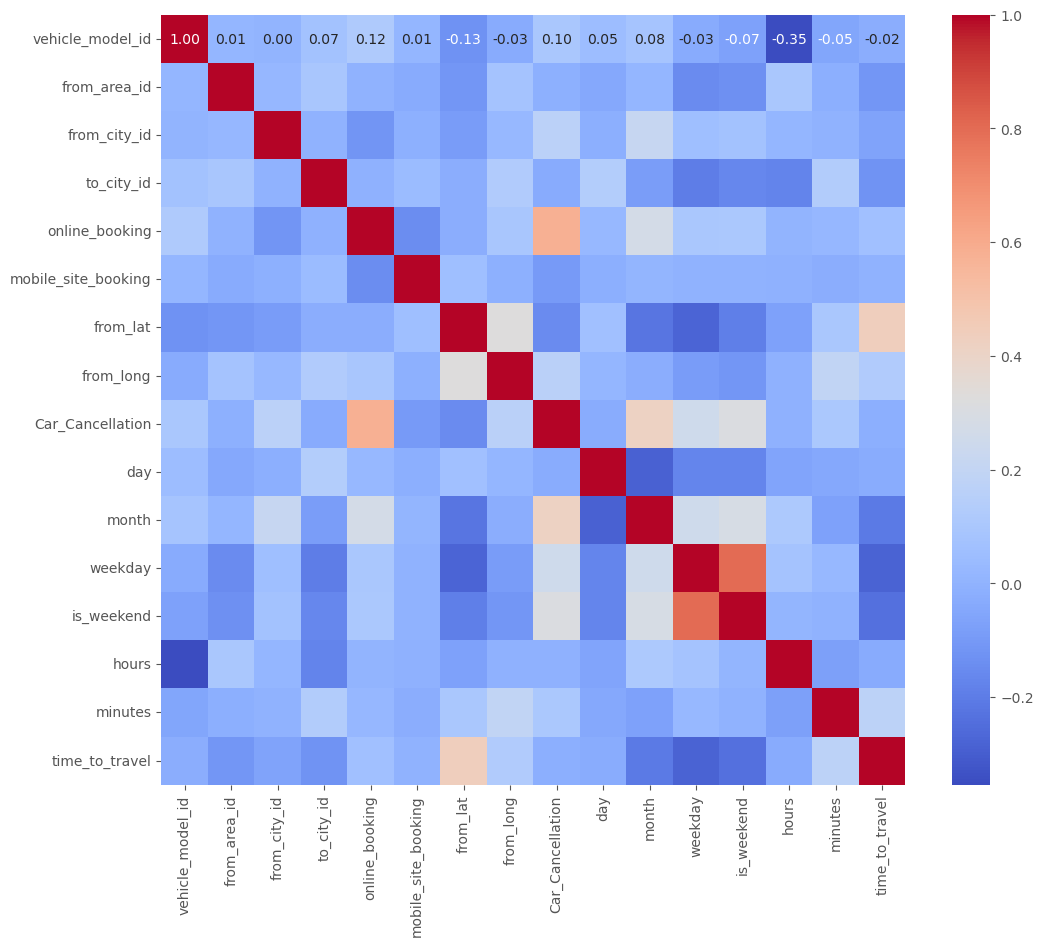

In [84]:
plt.figure(figsize=(12, 10))
sns.heatmap(data2_balanced.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.show()

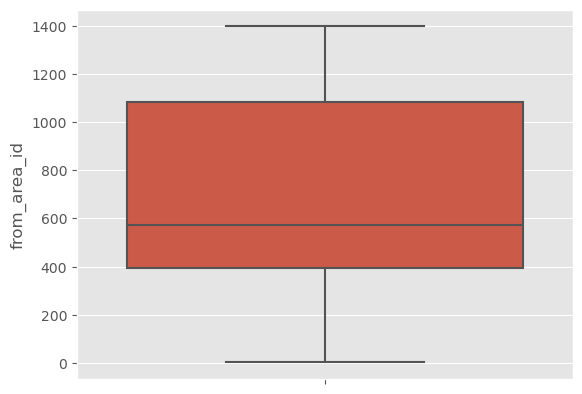

PathPatch6((-0.4, 393) ...)


In [85]:
ax=sns.boxplot(y='from_area_id',data=data2_balanced)
plt.show()
for patch in ax.patches:
    print(patch)

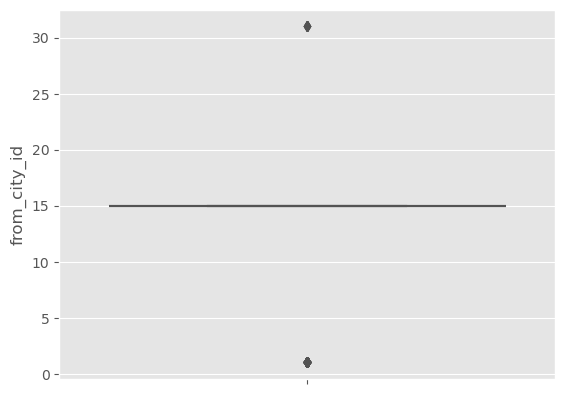

PathPatch6((-0.4, 15) ...)


In [86]:
ax=sns.boxplot(y='from_city_id',data=data2_balanced)
plt.show()
for patch in ax.patches:
    print(patch)

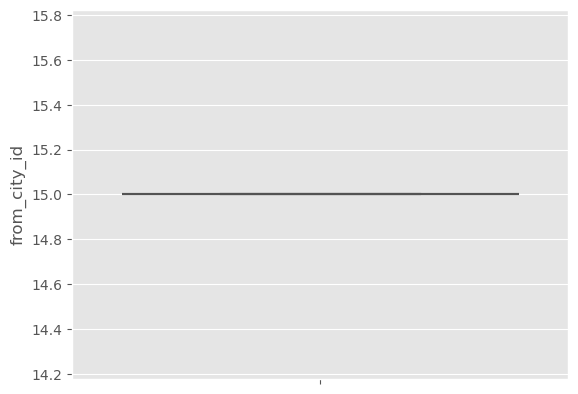

PathPatch6((-0.4, 15) ...)


In [87]:
f1 = data2_balanced['from_city_id'].sort_values(ascending=True)
q1 = f1.quantile(.25)
q3 = f1.quantile(.75)
iqr = q3 - q1
UB = q3 + (iqr * 1.5)
LB = q1 - (iqr * 1.5)
data2_balanced['from_city_id'].clip(lower=LB,upper=UB,inplace=True)
ax=sns.boxplot(y='from_city_id',data=data2_balanced)
plt.show()
for patch in ax.patches:
    print(patch)

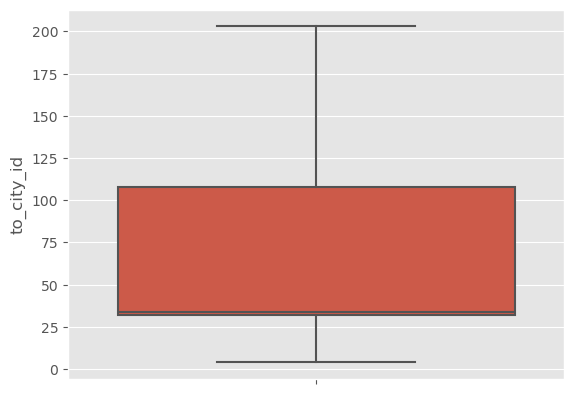

PathPatch6((-0.4, 32) ...)


In [88]:
ax=sns.boxplot(y='to_city_id',data=data2_balanced)
plt.show()
for patch in ax.patches:
    print(patch)

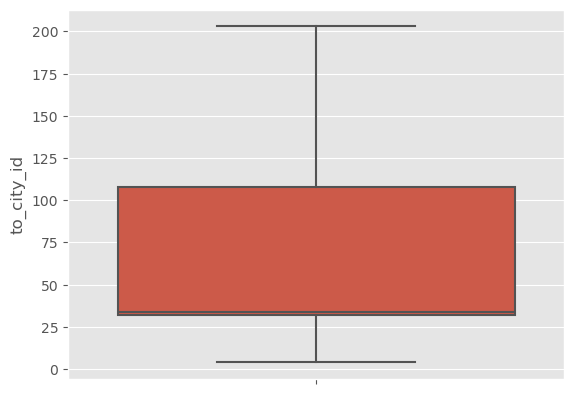

PathPatch6((-0.4, 32) ...)


In [89]:
ax=sns.boxplot(y='to_city_id',data=data2_balanced)
plt.show()
for patch in ax.patches:
    print(patch)

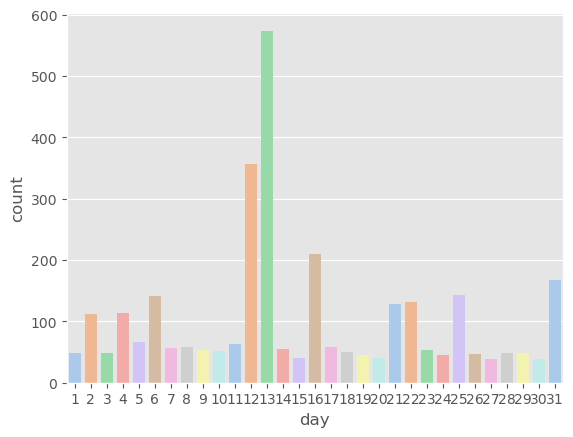

In [90]:
sns.countplot(x='day', data=data2_balanced, palette='pastel')
plt.show()

In [91]:
data2_balanced

,vehicle_model_id,from_area_id,from_city_id,to_city_id,online_booking,mobile_site_booking,from_lat,from_long,Car_Cancellation,day,month,weekday,is_weekend,hours,minutes,time_to_travel
6,12,571.0,15.0,108.0,0,0,12.951850,77.696420,0,1,1,1,0,9,21,0.400000
17,24,1383.0,15.0,32.0,1,0,12.930451,77.685822,0,1,1,1,0,12,17,259.716667
24,54,515.0,15.0,32.0,0,0,12.978960,77.673450,0,1,1,1,0,14,40,89.833333
158,28,136.0,15.0,152.0,1,0,12.907960,77.624180,0,3,1,3,0,12,19,21.183333
216,87,1118.0,15.0,32.0,1,0,12.930220,77.560390,0,4,1,4,0,9,32,45.966667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32085,65,1150.0,15.0,51.0,1,0,12.992870,77.716620,1,6,9,4,0,16,28,5.033333
15035,65,220.0,15.0,56.0,1,0,12.997220,77.620030,1,25,5,5,1,0,31,4.983333
10160,24,393.0,15.0,29.0,1,0,13.199560,77.706880,1,16,4,1,0,14,51,617.650000
33717,13,571.0,15.0,69.0,1,0,12.969368,77.655300,1,16,9,0,0,19,4,3.183333


In [92]:
#Decicion Tree

In [93]:

x = data2_balanced.drop(columns=['Car_Cancellation'])
y = data2_balanced['Car_Cancellation']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=25)
print(x_train.dtypes)

vehicle_model_id         int64
from_area_id           float64
from_city_id           float64
to_city_id             float64
online_booking           int64
mobile_site_booking      int64
from_lat               float64
from_long              float64
day                      int32
month                    int32
weekday                  int32
is_weekend               int64
hours                    int32
minutes                  int32
time_to_travel         float64
dtype: object


In [94]:

model_dt = DecisionTreeClassifier(random_state=1,max_depth=6)

model_dt.fit(x_train,y_train)

model_dt_score_train = model_dt.score(x_train,y_train)

model_dt_score_test = model_dt.score(x_test,y_test)

print('Training Score',model_dt_score_train)

print('Testing Score',model_dt_score_test)

Training Score 0.9812599681020734
Testing Score 0.9697452229299363


In [95]:



model_dt_ = DecisionTreeClassifier(random_state=1, max_depth=5, criterion='entropy')
model_dt_.fit(x_train,y_train)

model_dt_score_train = model_dt_.score(x_train,y_train)

model_dt_score_test = model_dt_.score(x_test,y_test)

print('Training Score',model_dt_score_train)

print('Testing Score',model_dt_score_test)

model_dt_ = DecisionTreeClassifier(random_state=1, max_depth=4, criterion='gini')
model_dt_.fit(x_train,y_train)

model_dt_score_train = model_dt_.score(x_train,y_train)

model_dt_score_test = model_dt_.score(x_test,y_test)

print('Training Score',model_dt_score_train)

print('Testing Score',model_dt_score_test)

model_dt_ = DecisionTreeClassifier(random_state=42, max_depth=4, criterion='entropy')
model_dt_.fit(x_train,y_train)

model_dt_score_train = model_dt_.score(x_train,y_train)

model_dt_score_test = model_dt_.score(x_test,y_test)

print('Training Score',model_dt_score_train)

print('Testing Score',model_dt_score_test)

model_dt_ = DecisionTreeClassifier(random_state=1, max_depth=4, criterion='entropy', max_leaf_nodes=10)
model_dt_.fit(x_train,y_train)

model_dt_score_train = model_dt_.score(x_train,y_train)

model_dt_score_test = model_dt_.score(x_test,y_test)

print('Training Score',model_dt_score_train)

print('Testing Score',model_dt_score_test)

model_dt_ = DecisionTreeClassifier(random_state=1, max_depth=4, criterion='entropy', min_samples_split=5)
model_dt_.fit(x_train,y_train)

model_dt_score_train = model_dt_.score(x_train,y_train)

model_dt_score_test = model_dt_.score(x_test,y_test)

print('Training Score',model_dt_score_train)

print('Testing Score',model_dt_score_test)

model_dt_ = DecisionTreeClassifier(random_state=1, max_depth=4, criterion='entropy', splitter='best')
model_dt_.fit(x_train,y_train)

model_dt_score_train = model_dt_.score(x_train,y_train)

model_dt_score_test = model_dt_.score(x_test,y_test)

print('Training Score',model_dt_score_train)

print('Testing Score',model_dt_score_test)

model_dt_ = DecisionTreeClassifier(random_state=1,max_depth=4,criterion='entropy')
model_dt_.fit(x_train,y_train)

model_dt_score_train = model_dt_.score(x_train,y_train)

model_dt_score_test = model_dt_.score(x_test,y_test)

print('Training Score',model_dt_score_train)

print('Testing Score',model_dt_score_test)


Training Score 0.919457735247209
Testing Score 0.9219745222929936
Training Score 0.9549441786283892
Testing Score 0.945859872611465
Training Score 0.9039074960127592
Testing Score 0.9044585987261147
Training Score 0.9039074960127592
Testing Score 0.9044585987261147
Training Score 0.9039074960127592
Testing Score 0.9044585987261147
Training Score 0.9039074960127592
Testing Score 0.9044585987261147
Training Score 0.9039074960127592
Testing Score 0.9044585987261147


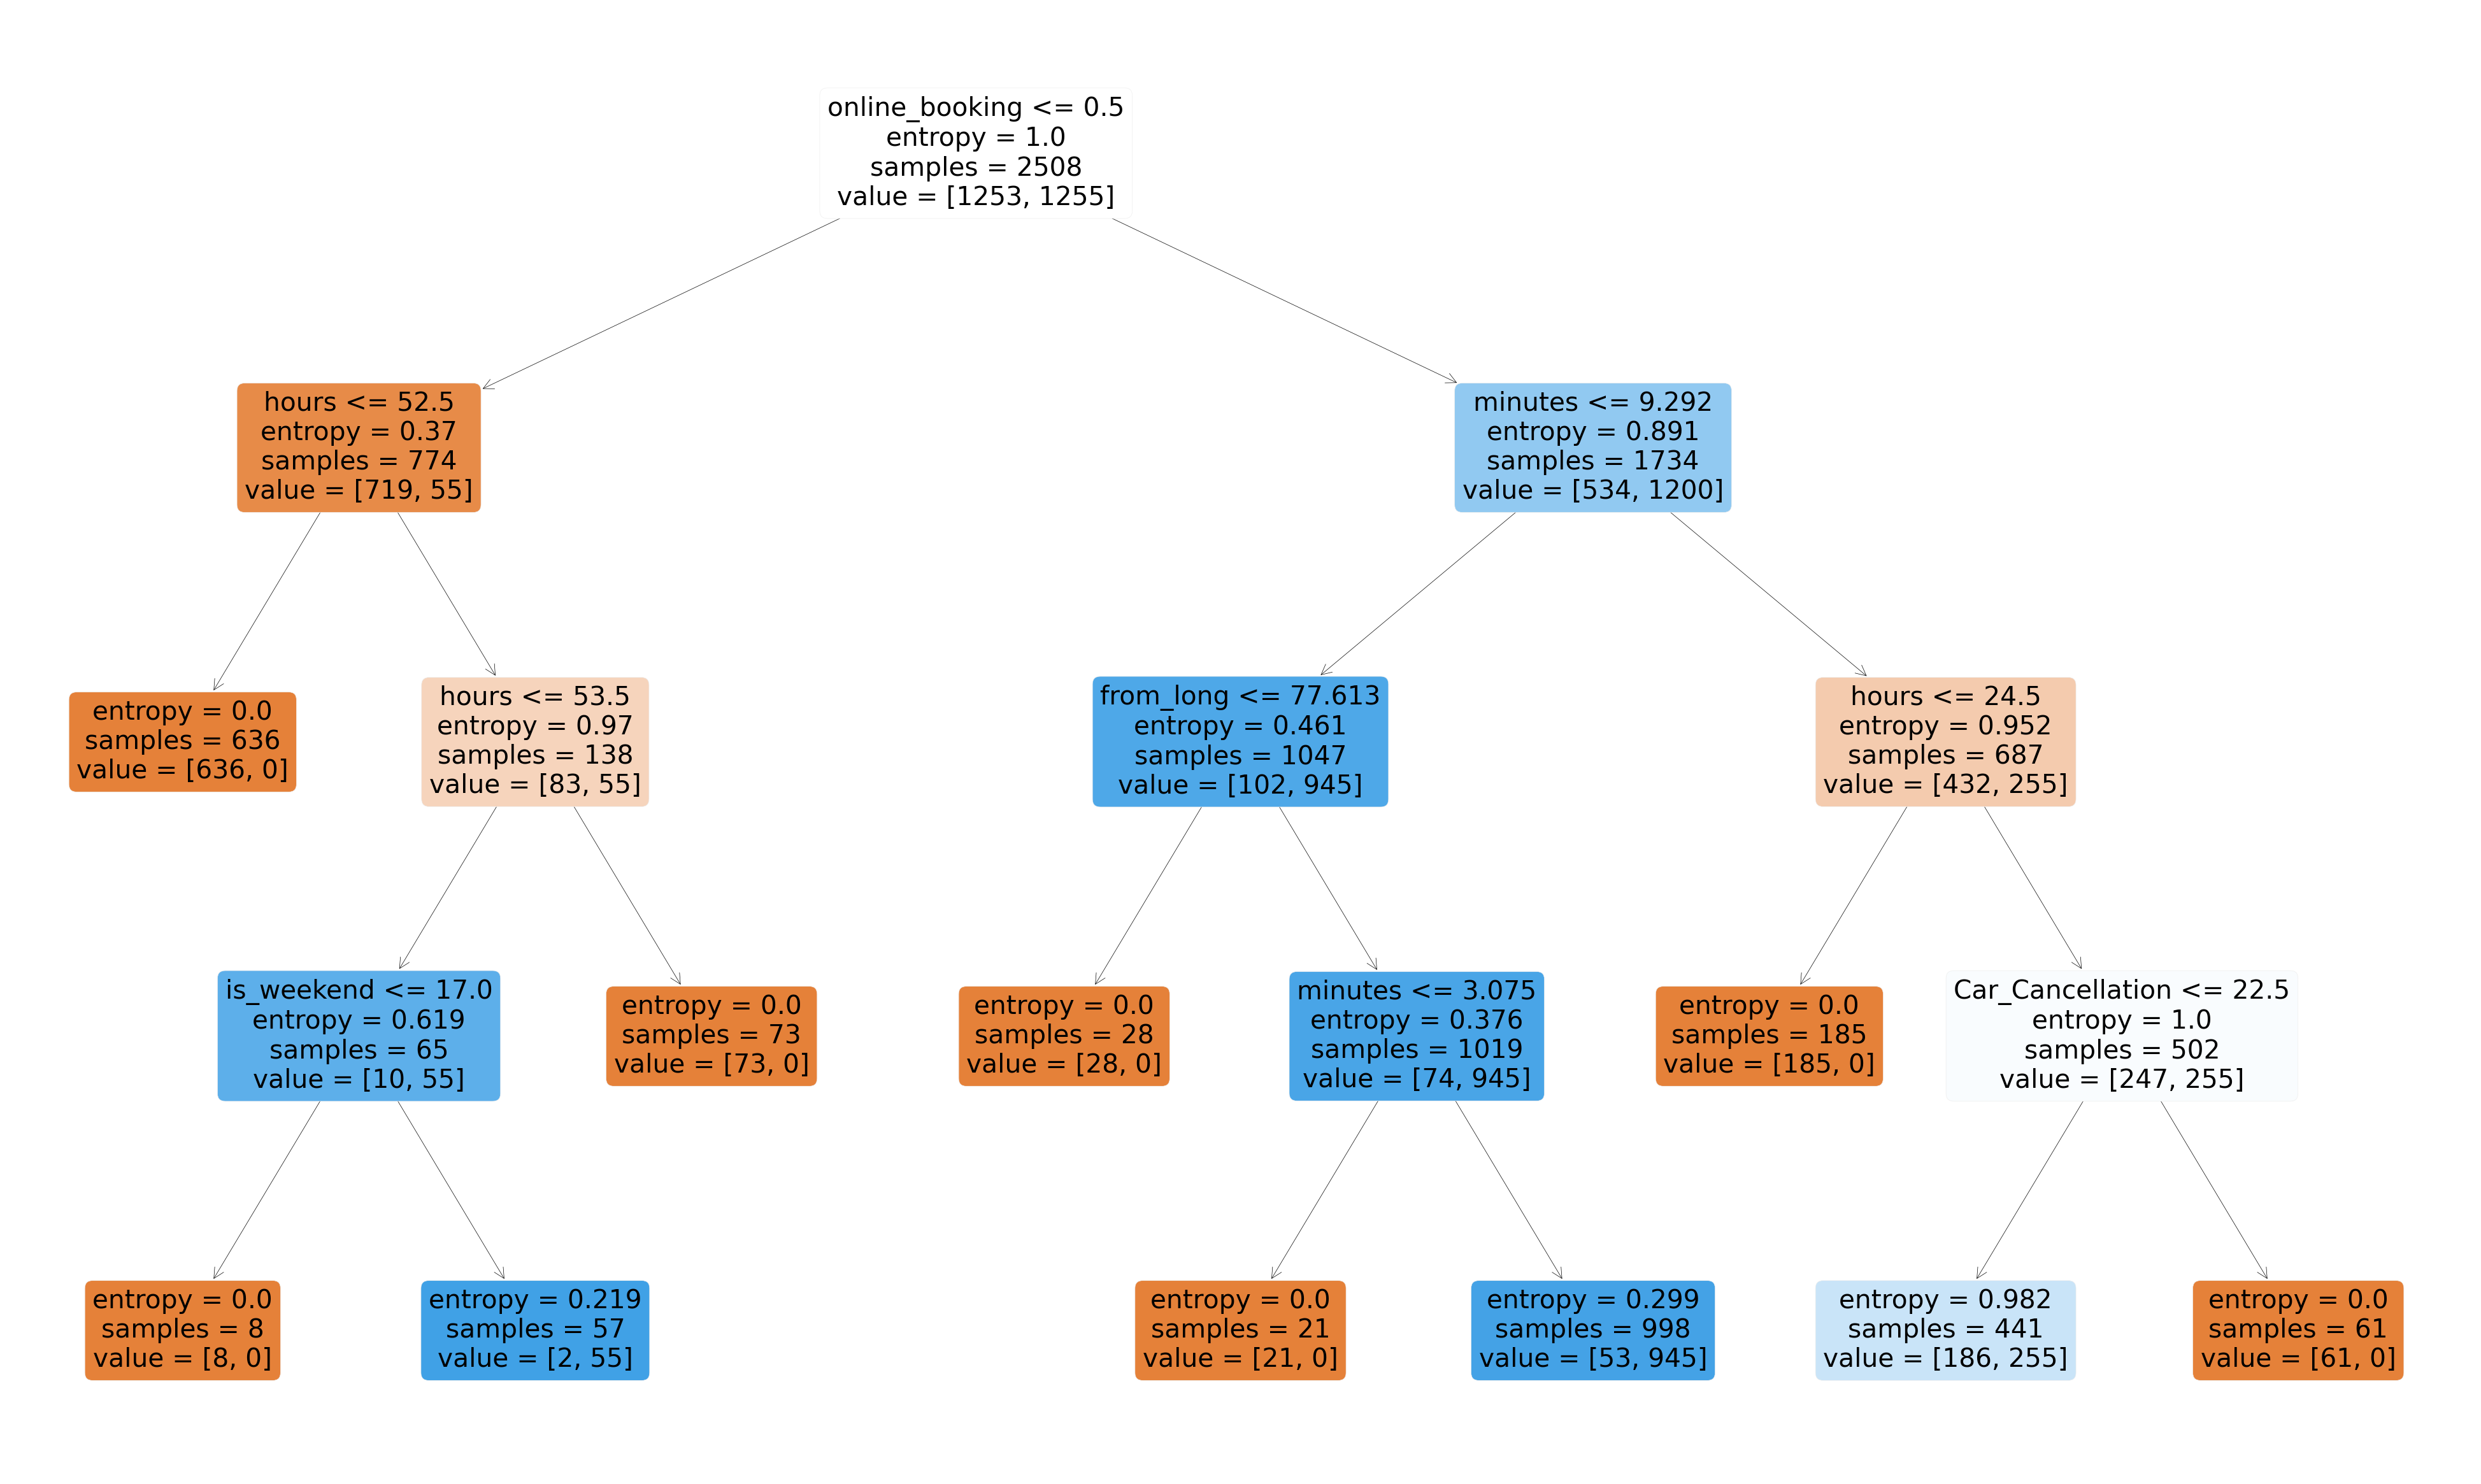

In [96]:
plt.figure(figsize=(50,30))  # Adjust size for better readability
plot_tree(model_dt_, feature_names=data2_balanced.columns,filled=True, rounded=True)
plt.show()

In [97]:
y_pred_dt = model_dt_.predict_proba(x_test)[:,1]
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_pred_dt)

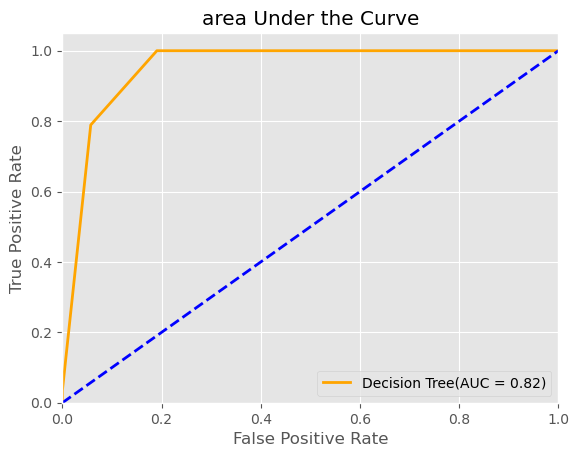

In [98]:

plt.figure(1)
lw=2
plt.plot(fpr_dt,tpr_dt,color='orange',lw=lw,label='Decision Tree(AUC = %0.2f)'%roc_auc_dt)
plt.plot([0,1],[0,1],color='blue',lw=lw,linestyle='--')

plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("area Under the Curve")
# plt.legend(loc="upper left")
plt.legend(loc="lower right")

In [99]:
predictions = model_dt_.predict(x_test)
print(confusion_matrix(y_test,predictions))

[[255  60]
 [  0 313]]


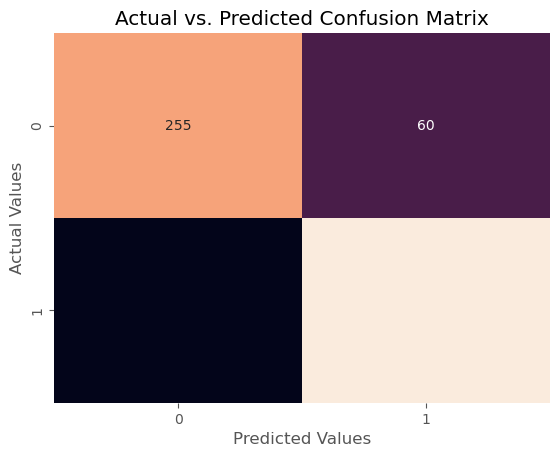

In [100]:
sns.heatmap(confusion_matrix(y_test,predictions), annot=True, fmt='d', cbar=False)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Actual vs. Predicted Confusion Matrix')
plt.show()

In [101]:
accuracy_score(y_test,predictions)

0.9044585987261147

In [102]:
#KNN
knn = KNeighborsClassifier(n_neighbors=3)
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=25)
knn.fit(x_train,y_train)
pred = knn.predict(x_test)
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

[[307   8]
 [  0 313]]
              precision    recall  f1-score   support

           0       1.00      0.97      0.99       315
           1       0.98      1.00      0.99       313

    accuracy                           0.99       628
   macro avg       0.99      0.99      0.99       628
weighted avg       0.99      0.99      0.99       628



In [103]:
accuracy_rate = []
error_rate = []
# May take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    score=cross_val_score(knn,x,data2_balanced['Car_Cancellation'],cv=10)
    accuracy_rate.append(score.mean())
    error_rate.append(1-score.mean())

Text(0, 0.5, 'Accuracy Rate')

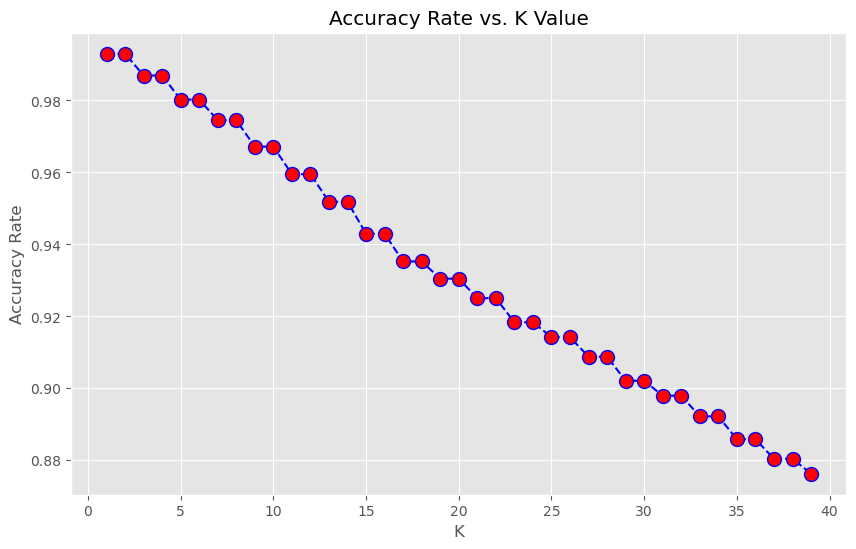

In [104]:
plt.figure(figsize=(10,6))
# plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
#         markerfacecolor='red', markersize=10)
# plt.title('Error Rate vs. K Value')
# plt.xlabel('K')
# plt.ylabel('Error Rate')

plt.plot(range(1,40),accuracy_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Accuracy Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy Rate')

In [105]:
knn = KNeighborsClassifier(n_neighbors=10)

knn.fit(x_train,y_train)
pred = knn.predict(x_test)

print('WITH K=10')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=10


[[300  15]
 [  0 313]]


              precision    recall  f1-score   support

           0       1.00      0.95      0.98       315
           1       0.95      1.00      0.98       313

    accuracy                           0.98       628
   macro avg       0.98      0.98      0.98       628
weighted avg       0.98      0.98      0.98       628



In [106]:
knn = KNeighborsClassifier(n_neighbors=30)

knn.fit(x_train,y_train)
pred = knn.predict(x_test)

print('WITH K=30')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=30


[[257  58]
 [  0 313]]


              precision    recall  f1-score   support

           0       1.00      0.82      0.90       315
           1       0.84      1.00      0.92       313

    accuracy                           0.91       628
   macro avg       0.92      0.91      0.91       628
weighted avg       0.92      0.91      0.91       628



In [107]:
#naive bayes
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=25)
model = GaussianNB()

model.fit(xtrain, ytrain)
pred = model.predict(xtest)
print(pred[:150])

[1 0 1 1 1 0 1 1 0 1 0 1 1 1 0 1 1 1 1 0 0 1 1 1 0 0 1 0 1 1 1 0 1 1 1 0 1
 1 1 1 1 1 1 1 0 0 1 0 0 1 1 1 1 1 0 1 0 1 1 0 1 0 1 1 0 1 1 1 1 1 1 0 1 0
 1 0 1 1 0 0 0 0 0 1 1 0 0 1 0 1 1 1 1 1 1 1 0 0 0 0 1 1 1 1 1 0 1 0 1 1 0
 0 0 1 0 1 0 1 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 0 0 1 0 1 0 1 0 1 0 1 0 0 1
 0 1]


[]

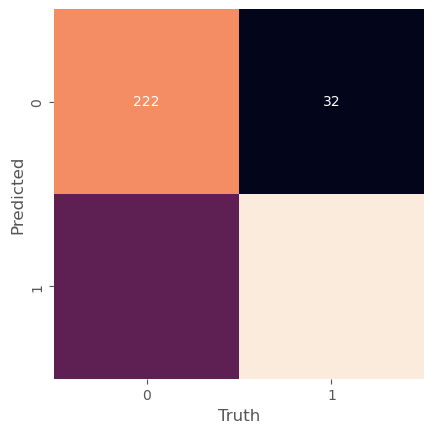

In [108]:
mat = confusion_matrix(pred, ytest)
names = np.unique(pred)
sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=names, yticklabels=names)
plt.xlabel('Truth')
plt.ylabel('Predicted')
plt.plot()

In [109]:
y_pred = pred
y_act = ytest
print(metrics.confusion_matrix(pred,ytest))
print(metrics.classification_report(pred, ytest))

[[222  32]
 [ 93 281]]
              precision    recall  f1-score   support

           0       0.70      0.87      0.78       254
           1       0.90      0.75      0.82       374

    accuracy                           0.80       628
   macro avg       0.80      0.81      0.80       628
weighted avg       0.82      0.80      0.80       628



In [110]:
#LOGISTICS REGRESSION
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=25)
standard_Scaler=StandardScaler()
x_train = standard_Scaler.fit_transform(x_train)
x_test = standard_Scaler.transform(x_test)
log_reg=LogisticRegression(random_state=0)
log_reg.fit(x_train,y_train)

LogisticRegression(random_state=0)

In [111]:

y_pred=log_reg.predict(x_test)
conf_matrix = confusion_matrix(y_test,y_pred)

Accuracy:  0.8996815286624203
Precision:  0.8531073446327684
Recall:  0.9648562300319489


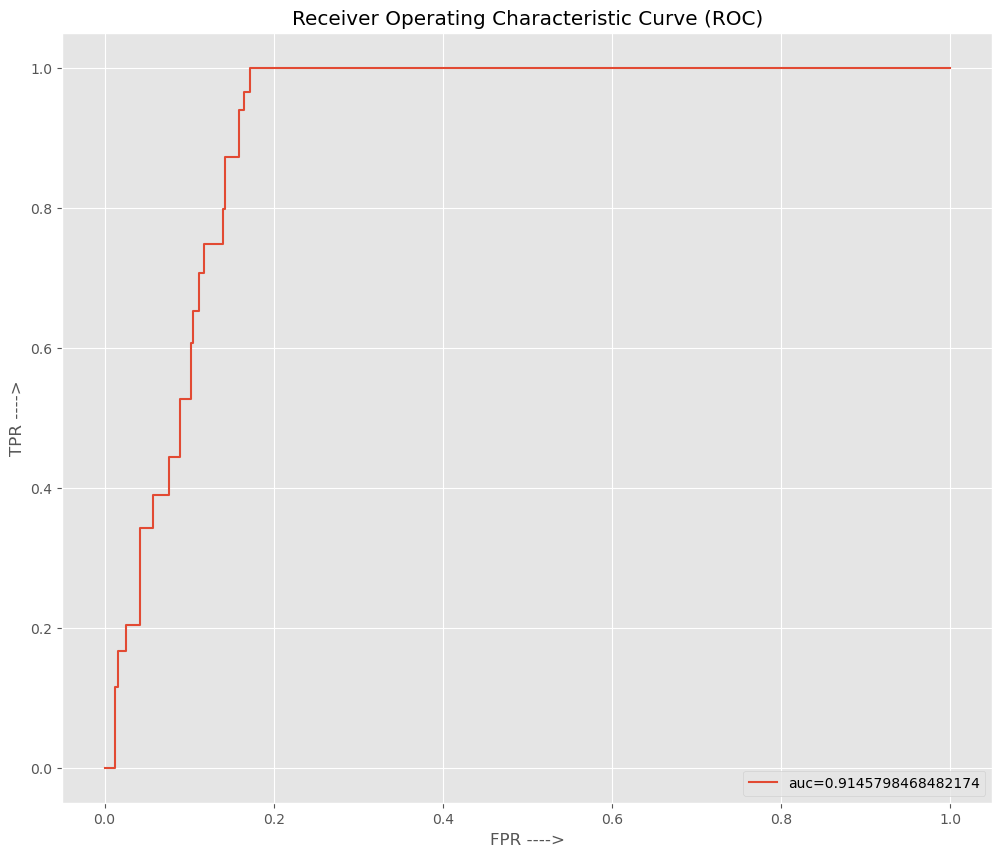

In [112]:
print("Accuracy: ", metrics.accuracy_score(y_test,y_pred))
print("Precision: ", metrics.precision_score(y_test,y_pred))
print("Recall: ", metrics.recall_score(y_test,y_pred))
y_pred_proba = log_reg.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.figure(figsize=(12,10))
plt.plot(fpr,tpr,label="auc="+str(auc))
plt.legend(loc=4)
plt.title("Receiver Operating Characteristic Curve (ROC)")
plt.xlabel("FPR ---->")
plt.ylabel("TPR ---->")
plt.show()

In [113]:
#for data3

In [114]:
data3=data[data['travel_type_id']==unique_id[2]]
data3

,vehicle_model_id,package_id,travel_type_id,from_area_id,to_area_id,from_city_id,to_city_id,from_date,online_booking,mobile_site_booking,booking_created,from_lat,from_long,to_lat,to_long,Car_Cancellation
8,65,2.0,3,448.0,NaN,NaN,NaN,01-01-2013 16:00,0,0,01-01-2013 09:44,12.927320,77.635750,NaN,NaN,0
20,87,2.0,3,471.0,NaN,NaN,NaN,01-01-2013 14:30,0,0,01-01-2013 12:52,13.018540,77.635240,NaN,NaN,0
23,12,1.0,3,1286.0,NaN,NaN,NaN,01-01-2013 16:30,0,0,01-01-2013 14:39,12.973448,77.620320,NaN,NaN,0
34,12,1.0,3,1323.0,NaN,NaN,NaN,01-01-2013 20:00,1,0,01-01-2013 17:25,12.869805,77.653211,NaN,NaN,0
47,12,2.0,3,142.0,NaN,NaN,NaN,01-02-2013 03:00,0,0,01-01-2013 19:37,12.912810,77.609230,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43415,12,1.0,3,768.0,NaN,15.0,NaN,11/24/2013 16:00,0,1,11/24/2013 12:32,12.989990,77.553320,NaN,NaN,0
43417,12,4.0,3,1390.0,NaN,15.0,NaN,11/24/2013 15:00,0,0,11/24/2013 13:06,12.969368,77.641302,NaN,NaN,0
43420,65,2.0,3,1237.0,NaN,15.0,NaN,11/25/2013 1:00,1,0,11/24/2013 13:54,12.926450,77.612060,NaN,NaN,0
43424,12,2.0,3,515.0,NaN,15.0,NaN,11/24/2013 15:15,0,0,11/24/2013 14:23,12.978960,77.673450,NaN,NaN,0


In [115]:
data3.nunique()

vehicle_model_id         20
package_id                7
travel_type_id            1
from_area_id            482
to_area_id                0
from_city_id              1
to_city_id                0
from_date              5652
online_booking            2
mobile_site_booking       2
booking_created        7316
from_lat                398
from_long               395
to_lat                    0
to_long                   0
Car_Cancellation          2
dtype: int64

In [116]:
data3.isnull().sum()

vehicle_model_id          0
package_id                0
travel_type_id            0
from_area_id              0
to_area_id             7550
from_city_id           7102
to_city_id             7550
from_date                 0
online_booking            0
mobile_site_booking       0
booking_created           0
from_lat                  0
from_long                 0
to_lat                 7550
to_long                7550
Car_Cancellation          0
dtype: int64

In [117]:
data3.drop('travel_type_id', inplace=True,axis=1)
data3.drop('to_area_id', inplace=True,axis=1)
data3.drop('from_city_id', inplace=True,axis=1)
data3.drop('to_city_id', inplace=True,axis=1)
data3.drop('to_lat', inplace=True,axis=1)
data3.drop('to_long', inplace=True,axis=1)
data3.drop('from_lat', inplace=True,axis=1)
data3.drop('from_long', inplace=True,axis=1)

In [118]:
car_cancellation_counts = data3['Car_Cancellation'].value_counts()
print(car_cancellation_counts)

Car_Cancellation
0    7214
1     336
Name: count, dtype: int64


In [119]:
#data balancing over sampling
from sklearn.utils import resample

# Separate majority and minority classes
data3_majority = data3[data3['Car_Cancellation'] == 0]
data3_minority = data3[data3['Car_Cancellation'] == 1]

# Upsample minority class
data3_minority_upsampled = resample(data3_minority, 
                                   replace=True, 
                                   n_samples=len(data3_majority), 
                                   random_state=42)

# Combine majority class with upsampled minority class
data3_balanced = pd.concat([data3_majority, data3_minority_upsampled])
data3_balanced

,vehicle_model_id,package_id,from_area_id,from_date,online_booking,mobile_site_booking,booking_created,Car_Cancellation
8,65,2.0,448.0,01-01-2013 16:00,0,0,01-01-2013 09:44,0
20,87,2.0,471.0,01-01-2013 14:30,0,0,01-01-2013 12:52,0
23,12,1.0,1286.0,01-01-2013 16:30,0,0,01-01-2013 14:39,0
34,12,1.0,1323.0,01-01-2013 20:00,1,0,01-01-2013 17:25,0
47,12,2.0,142.0,01-02-2013 03:00,0,0,01-01-2013 19:37,0
...,...,...,...,...,...,...,...,...
41174,12,6.0,1388.0,11-05-2013 07:15,0,0,11-04-2013 23:15,1
32380,12,1.0,1282.0,09-08-2013 15:30,1,0,09-08-2013 11:20,1
15252,12,1.0,373.0,5/26/2013 19:00,1,0,5/26/2013 10:19,1
31223,89,1.0,571.0,09-02-2013 10:00,1,0,09-01-2013 21:59,1


In [120]:
car_cancellation_counts = data3_balanced['Car_Cancellation'].value_counts()
print(car_cancellation_counts)

Car_Cancellation
0    7214
1    7214
Name: count, dtype: int64


In [121]:
data3_balanced.describe()

,vehicle_model_id,package_id,from_area_id,online_booking,mobile_site_booking,Car_Cancellation
count,14428.000000,14428.000000,14428.000000,14428.000000,14428.000000,14428.000000
mean,26.012268,2.260951,705.002495,0.426601,0.042972,0.500000
std,26.963495,1.750828,439.355079,0.494600,0.202801,0.500017
min,10.000000,1.000000,2.000000,0.000000,0.000000,0.000000
25%,12.000000,1.000000,293.000000,0.000000,0.000000,0.000000
50%,12.000000,2.000000,601.000000,0.000000,0.000000,0.500000
75%,12.000000,2.000000,1096.000000,1.000000,0.000000,1.000000
max,90.000000,7.000000,1401.000000,1.000000,1.000000,1.000000


In [122]:
data3_balanced.describe(include='all')

,vehicle_model_id,package_id,from_area_id,from_date,online_booking,mobile_site_booking,booking_created,Car_Cancellation
count,14428.000000,14428.000000,14428.000000,14428,14428.000000,14428.000000,14428,14428.000000
unique,NaN,NaN,NaN,5652,NaN,NaN,7316,NaN
top,NaN,NaN,NaN,05-12-2013 09:00,NaN,NaN,9/15/2013 21:25,NaN
freq,NaN,NaN,NaN,96,NaN,NaN,46,NaN
mean,26.012268,2.260951,705.002495,NaN,0.426601,0.042972,NaN,0.500000
std,26.963495,1.750828,439.355079,NaN,0.494600,0.202801,NaN,0.500017
min,10.000000,1.000000,2.000000,NaN,0.000000,0.000000,NaN,0.000000
25%,12.000000,1.000000,293.000000,NaN,0.000000,0.000000,NaN,0.000000
50%,12.000000,2.000000,601.000000,NaN,0.000000,0.000000,NaN,0.500000
75%,12.000000,2.000000,1096.000000,NaN,1.000000,0.000000,NaN,1.000000


In [123]:
data3_balanced.isnull().sum()/len(data2)*100

vehicle_model_id       0.0
package_id             0.0
from_area_id           0.0
from_date              0.0
online_booking         0.0
mobile_site_booking    0.0
booking_created        0.0
Car_Cancellation       0.0
dtype: float64

In [124]:
data3_balanced['from_date'] = pd.to_datetime(data3_balanced['from_date'], format='mixed')
data3_balanced['day'] = data3_balanced['from_date'].dt.day
data3_balanced['month'] = data3_balanced['from_date'].dt.month
data3_balanced['weekday'] = data3_balanced['from_date'].dt.weekday
data3_balanced['time'] = data3_balanced['from_date'].dt.time
data3_balanced['is_weekend'] = data3_balanced['from_date'].dt.weekday >= 5

data3_balanced['booking_created'] = pd.to_datetime(data3_balanced['booking_created'], format='mixed')
data3_balanced['day'] = data3_balanced['booking_created'].dt.day
data3_balanced['month'] = data3_balanced['booking_created'].dt.month
data3_balanced['weekday'] = data3_balanced['booking_created'].dt.weekday
data3_balanced['time'] = data3_balanced['booking_created'].dt.time
data3_balanced['is_weekend'] = data3_balanced['booking_created'].dt.weekday >= 5

data3_balanced


,vehicle_model_id,package_id,from_area_id,from_date,online_booking,mobile_site_booking,booking_created,Car_Cancellation,day,month,weekday,time,is_weekend
8,65,2.0,448.0,2013-01-01 16:00:00,0,0,2013-01-01 09:44:00,0,1,1,1,09:44:00,False
20,87,2.0,471.0,2013-01-01 14:30:00,0,0,2013-01-01 12:52:00,0,1,1,1,12:52:00,False
23,12,1.0,1286.0,2013-01-01 16:30:00,0,0,2013-01-01 14:39:00,0,1,1,1,14:39:00,False
34,12,1.0,1323.0,2013-01-01 20:00:00,1,0,2013-01-01 17:25:00,0,1,1,1,17:25:00,False
47,12,2.0,142.0,2013-01-02 03:00:00,0,0,2013-01-01 19:37:00,0,1,1,1,19:37:00,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
41174,12,6.0,1388.0,2013-11-05 07:15:00,0,0,2013-11-04 23:15:00,1,4,11,0,23:15:00,False
32380,12,1.0,1282.0,2013-09-08 15:30:00,1,0,2013-09-08 11:20:00,1,8,9,6,11:20:00,True
15252,12,1.0,373.0,2013-05-26 19:00:00,1,0,2013-05-26 10:19:00,1,26,5,6,10:19:00,True
31223,89,1.0,571.0,2013-09-02 10:00:00,1,0,2013-09-01 21:59:00,1,1,9,6,21:59:00,True


In [125]:

data3_balanced['time'] = data3_balanced['time'].astype(str)

data3_balanced[['hours', 'minutes', 'seconds']] = data3_balanced['time'].str.split(':', expand=True)

data3_balanced[['hours', 'minutes', 'seconds']] = data3_balanced[['hours', 'minutes', 'seconds']].astype(int)

del data3_balanced['time']
del data3_balanced['seconds']

data3_balanced

,vehicle_model_id,package_id,from_area_id,from_date,online_booking,mobile_site_booking,booking_created,Car_Cancellation,day,month,weekday,is_weekend,hours,minutes
8,65,2.0,448.0,2013-01-01 16:00:00,0,0,2013-01-01 09:44:00,0,1,1,1,False,9,44
20,87,2.0,471.0,2013-01-01 14:30:00,0,0,2013-01-01 12:52:00,0,1,1,1,False,12,52
23,12,1.0,1286.0,2013-01-01 16:30:00,0,0,2013-01-01 14:39:00,0,1,1,1,False,14,39
34,12,1.0,1323.0,2013-01-01 20:00:00,1,0,2013-01-01 17:25:00,0,1,1,1,False,17,25
47,12,2.0,142.0,2013-01-02 03:00:00,0,0,2013-01-01 19:37:00,0,1,1,1,False,19,37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41174,12,6.0,1388.0,2013-11-05 07:15:00,0,0,2013-11-04 23:15:00,1,4,11,0,False,23,15
32380,12,1.0,1282.0,2013-09-08 15:30:00,1,0,2013-09-08 11:20:00,1,8,9,6,True,11,20
15252,12,1.0,373.0,2013-05-26 19:00:00,1,0,2013-05-26 10:19:00,1,26,5,6,True,10,19
31223,89,1.0,571.0,2013-09-02 10:00:00,1,0,2013-09-01 21:59:00,1,1,9,6,True,21,59


In [126]:
data3_balanced['time_to_travel'] = (data3_balanced['from_date'] - data3_balanced['booking_created']).dt.total_seconds() / 3600
del data3_balanced['from_date']
del data3_balanced['booking_created']

data3_balanced

,vehicle_model_id,package_id,from_area_id,online_booking,mobile_site_booking,Car_Cancellation,day,month,weekday,is_weekend,hours,minutes,time_to_travel
8,65,2.0,448.0,0,0,0,1,1,1,False,9,44,6.266667
20,87,2.0,471.0,0,0,0,1,1,1,False,12,52,1.633333
23,12,1.0,1286.0,0,0,0,1,1,1,False,14,39,1.850000
34,12,1.0,1323.0,1,0,0,1,1,1,False,17,25,2.583333
47,12,2.0,142.0,0,0,0,1,1,1,False,19,37,7.383333
...,...,...,...,...,...,...,...,...,...,...,...,...,...
41174,12,6.0,1388.0,0,0,1,4,11,0,False,23,15,8.000000
32380,12,1.0,1282.0,1,0,1,8,9,6,True,11,20,4.166667
15252,12,1.0,373.0,1,0,1,26,5,6,True,10,19,8.683333
31223,89,1.0,571.0,1,0,1,1,9,6,True,21,59,12.016667


In [127]:
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
le = LabelEncoder()

# Encode the 'is_weekend' column
data3_balanced['is_weekend'] = le.fit_transform(data3_balanced['is_weekend'])


In [128]:
data3_balanced.corr()

,vehicle_model_id,package_id,from_area_id,online_booking,mobile_site_booking,Car_Cancellation,day,month,weekday,is_weekend,hours,minutes,time_to_travel
vehicle_model_id,1.000000,-0.040109,-0.035054,0.019109,0.023329,-0.029899,0.040069,0.007484,0.019559,0.018419,0.005182,0.004749,0.053927
package_id,-0.040109,1.000000,-0.015257,-0.082697,-0.068869,0.144774,0.050478,0.467485,-0.052784,-0.040829,0.125282,0.001053,0.172946
from_area_id,-0.035054,-0.015257,1.000000,0.040888,-0.028435,-0.060517,-0.015488,-0.002190,-0.034419,-0.021746,-0.046955,-0.006006,-0.021315
online_booking,0.019109,-0.082697,0.040888,1.000000,-0.182773,0.317412,-0.031553,0.137558,0.112998,0.092504,0.038697,0.015958,-0.007599
mobile_site_booking,0.023329,-0.068869,-0.028435,-0.182773,1.000000,0.088861,0.039115,0.080089,0.066557,0.078976,0.000820,-0.045128,-0.028294
Car_Cancellation,-0.029899,0.144774,-0.060517,0.317412,0.088861,1.000000,-0.048620,0.251898,0.222310,0.213680,0.012371,0.025961,-0.030035
day,0.040069,0.050478,-0.015488,-0.031553,0.039115,-0.048620,1.000000,-0.045080,-0.012578,-0.036779,-0.006882,-0.018922,0.044539
month,0.007484,0.467485,-0.002190,0.137558,0.080089,0.251898,-0.045080,1.000000,-0.026785,-0.016946,0.060473,0.017315,0.069054
weekday,0.019559,-0.052784,-0.034419,0.112998,0.066557,0.222310,-0.012578,-0.026785,1.000000,0.833154,-0.035423,0.013430,-0.014586
is_weekend,0.018419,-0.040829,-0.021746,0.092504,0.078976,0.213680,-0.036779,-0.016946,0.833154,1.000000,-0.030707,0.013470,-0.033016


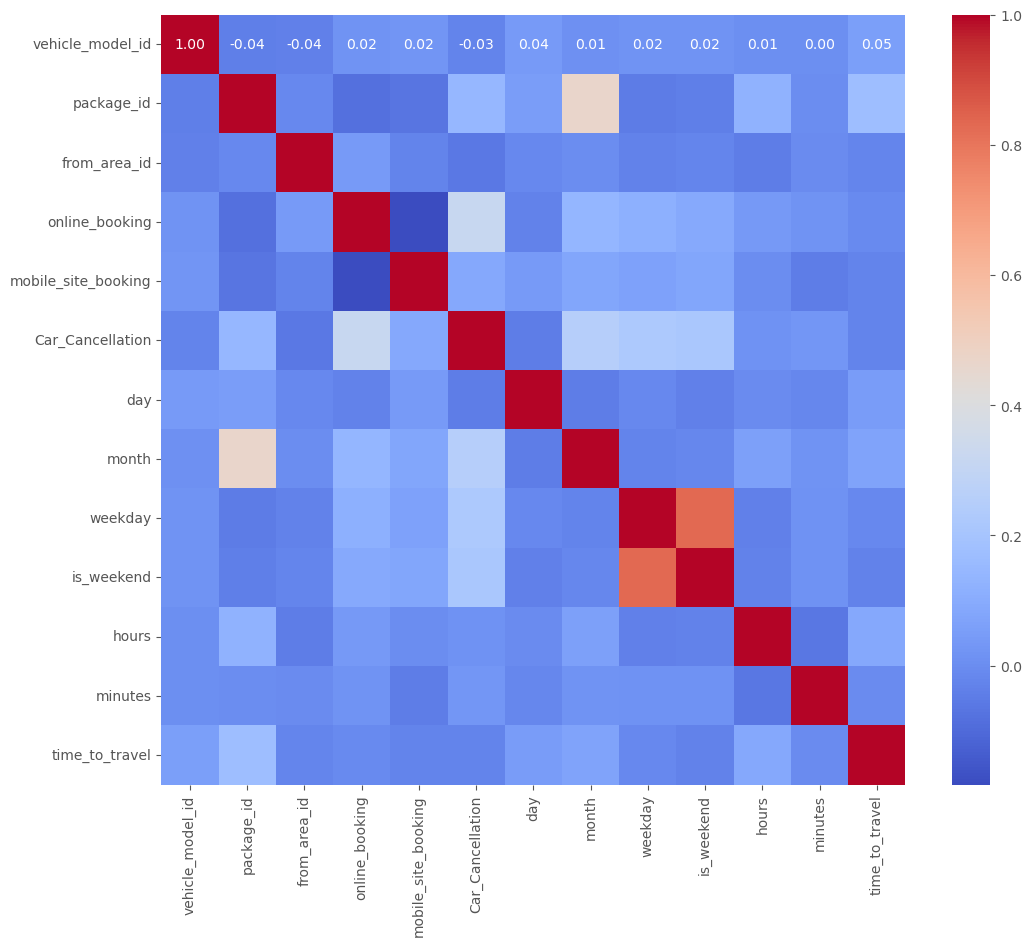

In [129]:
plt.figure(figsize=(12, 10))
sns.heatmap(data3_balanced.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.show()

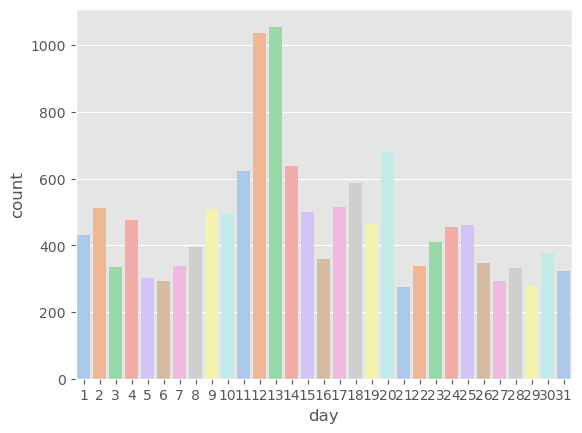

In [130]:
sns.countplot(x='day', data=data3_balanced, palette='pastel')
plt.show()

In [131]:
data3_balanced.columns

Index(['vehicle_model_id', 'package_id', 'from_area_id', 'online_booking',
       'mobile_site_booking', 'Car_Cancellation', 'day', 'month', 'weekday',
       'is_weekend', 'hours', 'minutes', 'time_to_travel'],
      dtype='object')

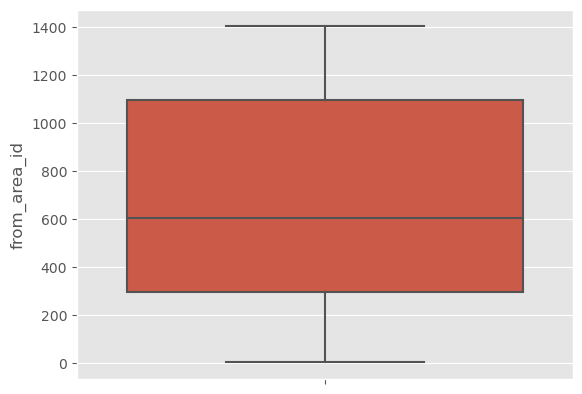

PathPatch6((-0.4, 293) ...)


In [132]:
ax=sns.boxplot(y='from_area_id',data=data3_balanced)
plt.show()
for patch in ax.patches:
    print(patch)

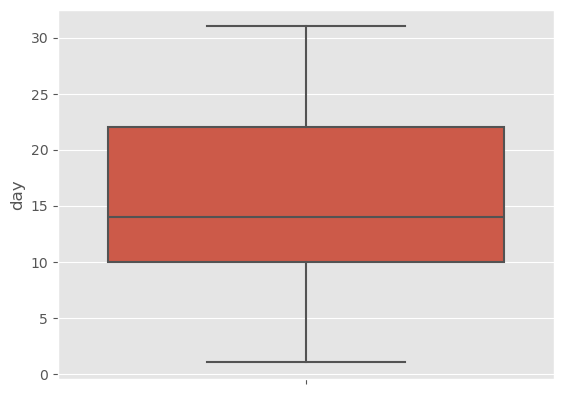

PathPatch6((-0.4, 10) ...)


In [133]:
ax=sns.boxplot(y='day',data=data3_balanced)
plt.show()
for patch in ax.patches:
    print(patch)

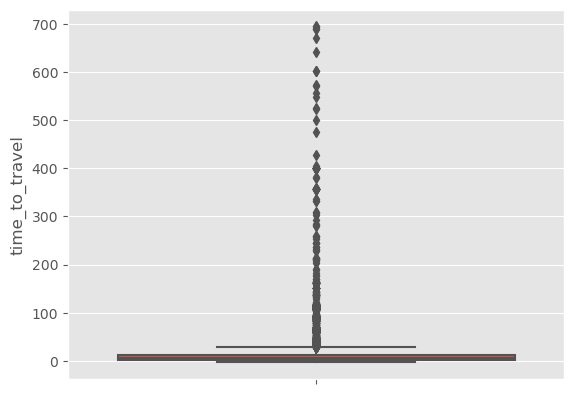

PathPatch6((-0.4, 2.13333) ...)


In [134]:
ax=sns.boxplot(y='time_to_travel',data=data3_balanced)
plt.show()
for patch in ax.patches:
    print(patch)

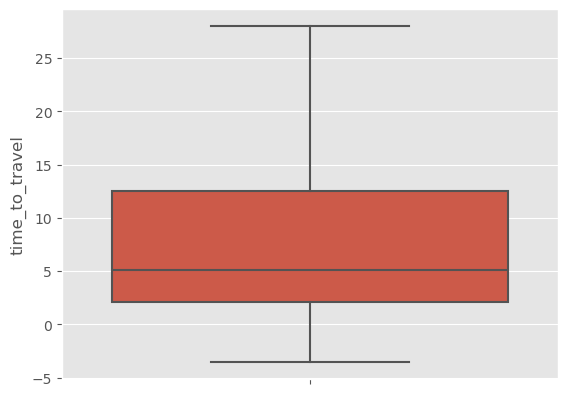

PathPatch6((-0.4, 2.13333) ...)


In [135]:
f1 = data3_balanced['time_to_travel'].sort_values(ascending=True)
q1 = f1.quantile(.25)
q3 = f1.quantile(.75)
iqr = q3 - q1
UB = q3 + (iqr * 1.5)
LB = q1 - (iqr * 1.5)
data3_balanced['time_to_travel'].clip(lower=LB,upper=UB,inplace=True)
ax=sns.boxplot(y='time_to_travel',data=data3_balanced)
plt.show()
for patch in ax.patches:
    print(patch)

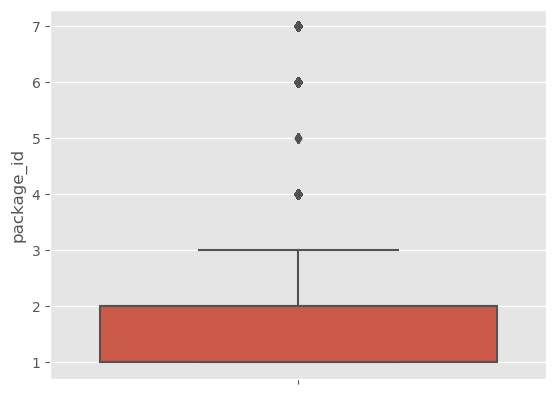

PathPatch6((-0.4, 1) ...)


In [136]:
ax=sns.boxplot(y='package_id',data=data3_balanced)
plt.show()
for patch in ax.patches:
    print(patch)

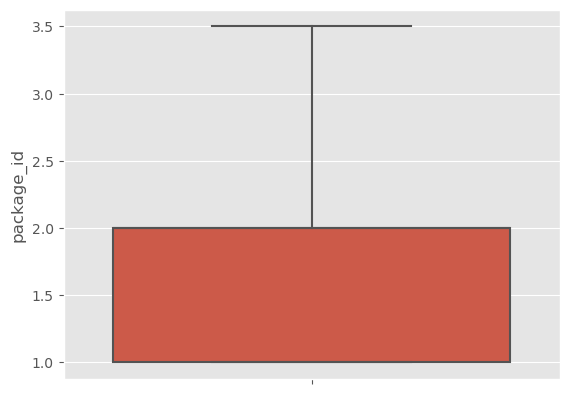

PathPatch6((-0.4, 1) ...)


In [137]:
f1 = data3_balanced['package_id'].sort_values(ascending=True)
q1 = f1.quantile(.25)
q3 = f1.quantile(.75)
iqr = q3 - q1
UB = q3 + (iqr * 1.5)
LB = q1 - (iqr * 1.5)
data3_balanced['package_id'].clip(lower=LB,upper=UB,inplace=True)
ax=sns.boxplot(y='package_id',data=data3_balanced)
plt.show()
for patch in ax.patches:
    print(patch)

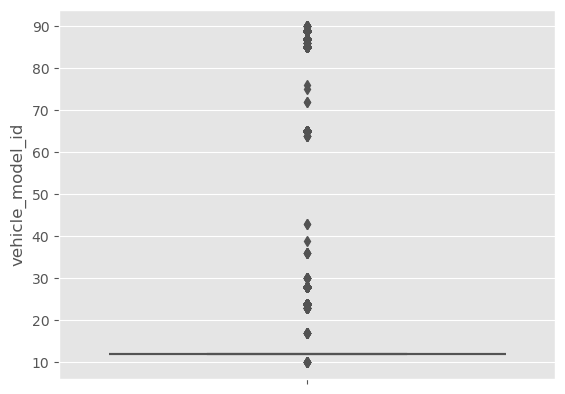

PathPatch6((-0.4, 12) ...)


In [138]:
ax=sns.boxplot(y='vehicle_model_id',data=data3_balanced)
plt.show()
for patch in ax.patches:
    print(patch)

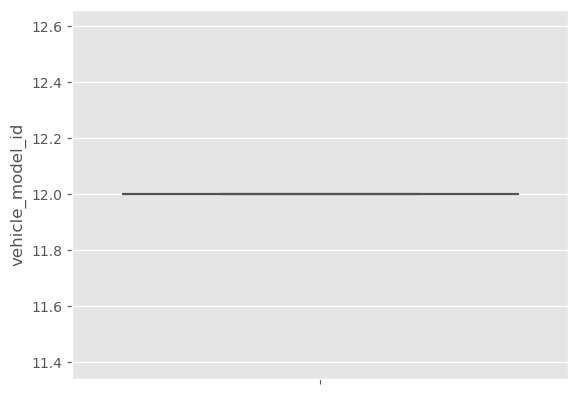

PathPatch6((-0.4, 12) ...)


In [139]:
f1 = data3_balanced['vehicle_model_id'].sort_values(ascending=True)
q1 = f1.quantile(.25)
q3 = f1.quantile(.75)
iqr = q3 - q1
UB = q3 + (iqr * 1.5)
LB = q1 - (iqr * 1.5)
data3_balanced['vehicle_model_id'].clip(lower=LB,upper=UB,inplace=True)
ax=sns.boxplot(y='vehicle_model_id',data=data3_balanced)
plt.show()
for patch in ax.patches:
    print(patch)

In [140]:
#Decicion Tree

x = data3_balanced.drop(columns=['Car_Cancellation'])
y = data3_balanced['Car_Cancellation']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=25)


In [141]:

model_dt = DecisionTreeClassifier(random_state=1,max_depth=6)

model_dt.fit(x_train,y_train)

model_dt_score_train = model_dt.score(x_train,y_train)

model_dt_score_test = model_dt.score(x_test,y_test)

print('Training Score',model_dt_score_train)

print('Testing Score',model_dt_score_test)

Training Score 0.8133772309824987
Testing Score 0.808038808038808


In [142]:



model_dt_ = DecisionTreeClassifier(random_state=1, max_depth=5, criterion='entropy')
model_dt_.fit(x_train,y_train)

model_dt_score_train = model_dt_.score(x_train,y_train)

model_dt_score_test = model_dt_.score(x_test,y_test)

print('Training Score',model_dt_score_train)

print('Testing Score',model_dt_score_test)

model_dt_ = DecisionTreeClassifier(random_state=1, max_depth=4, criterion='gini')
model_dt_.fit(x_train,y_train)

model_dt_score_train = model_dt_.score(x_train,y_train)

model_dt_score_test = model_dt_.score(x_test,y_test)

print('Training Score',model_dt_score_train)

print('Testing Score',model_dt_score_test)

model_dt_ = DecisionTreeClassifier(random_state=42, max_depth=4, criterion='entropy')
model_dt_.fit(x_train,y_train)

model_dt_score_train = model_dt_.score(x_train,y_train)

model_dt_score_test = model_dt_.score(x_test,y_test)

print('Training Score',model_dt_score_train)

print('Testing Score',model_dt_score_test)

model_dt_ = DecisionTreeClassifier(random_state=1, max_depth=4, criterion='entropy', max_leaf_nodes=10)
model_dt_.fit(x_train,y_train)

model_dt_score_train = model_dt_.score(x_train,y_train)

model_dt_score_test = model_dt_.score(x_test,y_test)

print('Training Score',model_dt_score_train)

print('Testing Score',model_dt_score_test)

model_dt_ = DecisionTreeClassifier(random_state=1, max_depth=4, criterion='entropy', min_samples_split=5)
model_dt_.fit(x_train,y_train)

model_dt_score_train = model_dt_.score(x_train,y_train)

model_dt_score_test = model_dt_.score(x_test,y_test)

print('Training Score',model_dt_score_train)

print('Testing Score',model_dt_score_test)

model_dt_ = DecisionTreeClassifier(random_state=1, max_depth=4, criterion='entropy', splitter='best')
model_dt_.fit(x_train,y_train)

model_dt_score_train = model_dt_.score(x_train,y_train)

model_dt_score_test = model_dt_.score(x_test,y_test)

print('Training Score',model_dt_score_train)

print('Testing Score',model_dt_score_test)

model_dt_ = DecisionTreeClassifier(random_state=1,max_depth=4,criterion='entropy')
model_dt_.fit(x_train,y_train)

model_dt_score_train = model_dt_.score(x_train,y_train)

model_dt_score_test = model_dt_.score(x_test,y_test)

print('Training Score',model_dt_score_train)

print('Testing Score',model_dt_score_test)


Training Score 0.7482238780107434
Testing Score 0.7508662508662509
Training Score 0.7451914746144516
Testing Score 0.7474012474012474
Training Score 0.7379137064633512
Testing Score 0.7397782397782398
Training Score 0.719199445503379
Testing Score 0.7172557172557172
Training Score 0.7379137064633512
Testing Score 0.7397782397782398
Training Score 0.7379137064633512
Testing Score 0.7397782397782398
Training Score 0.7379137064633512
Testing Score 0.7397782397782398


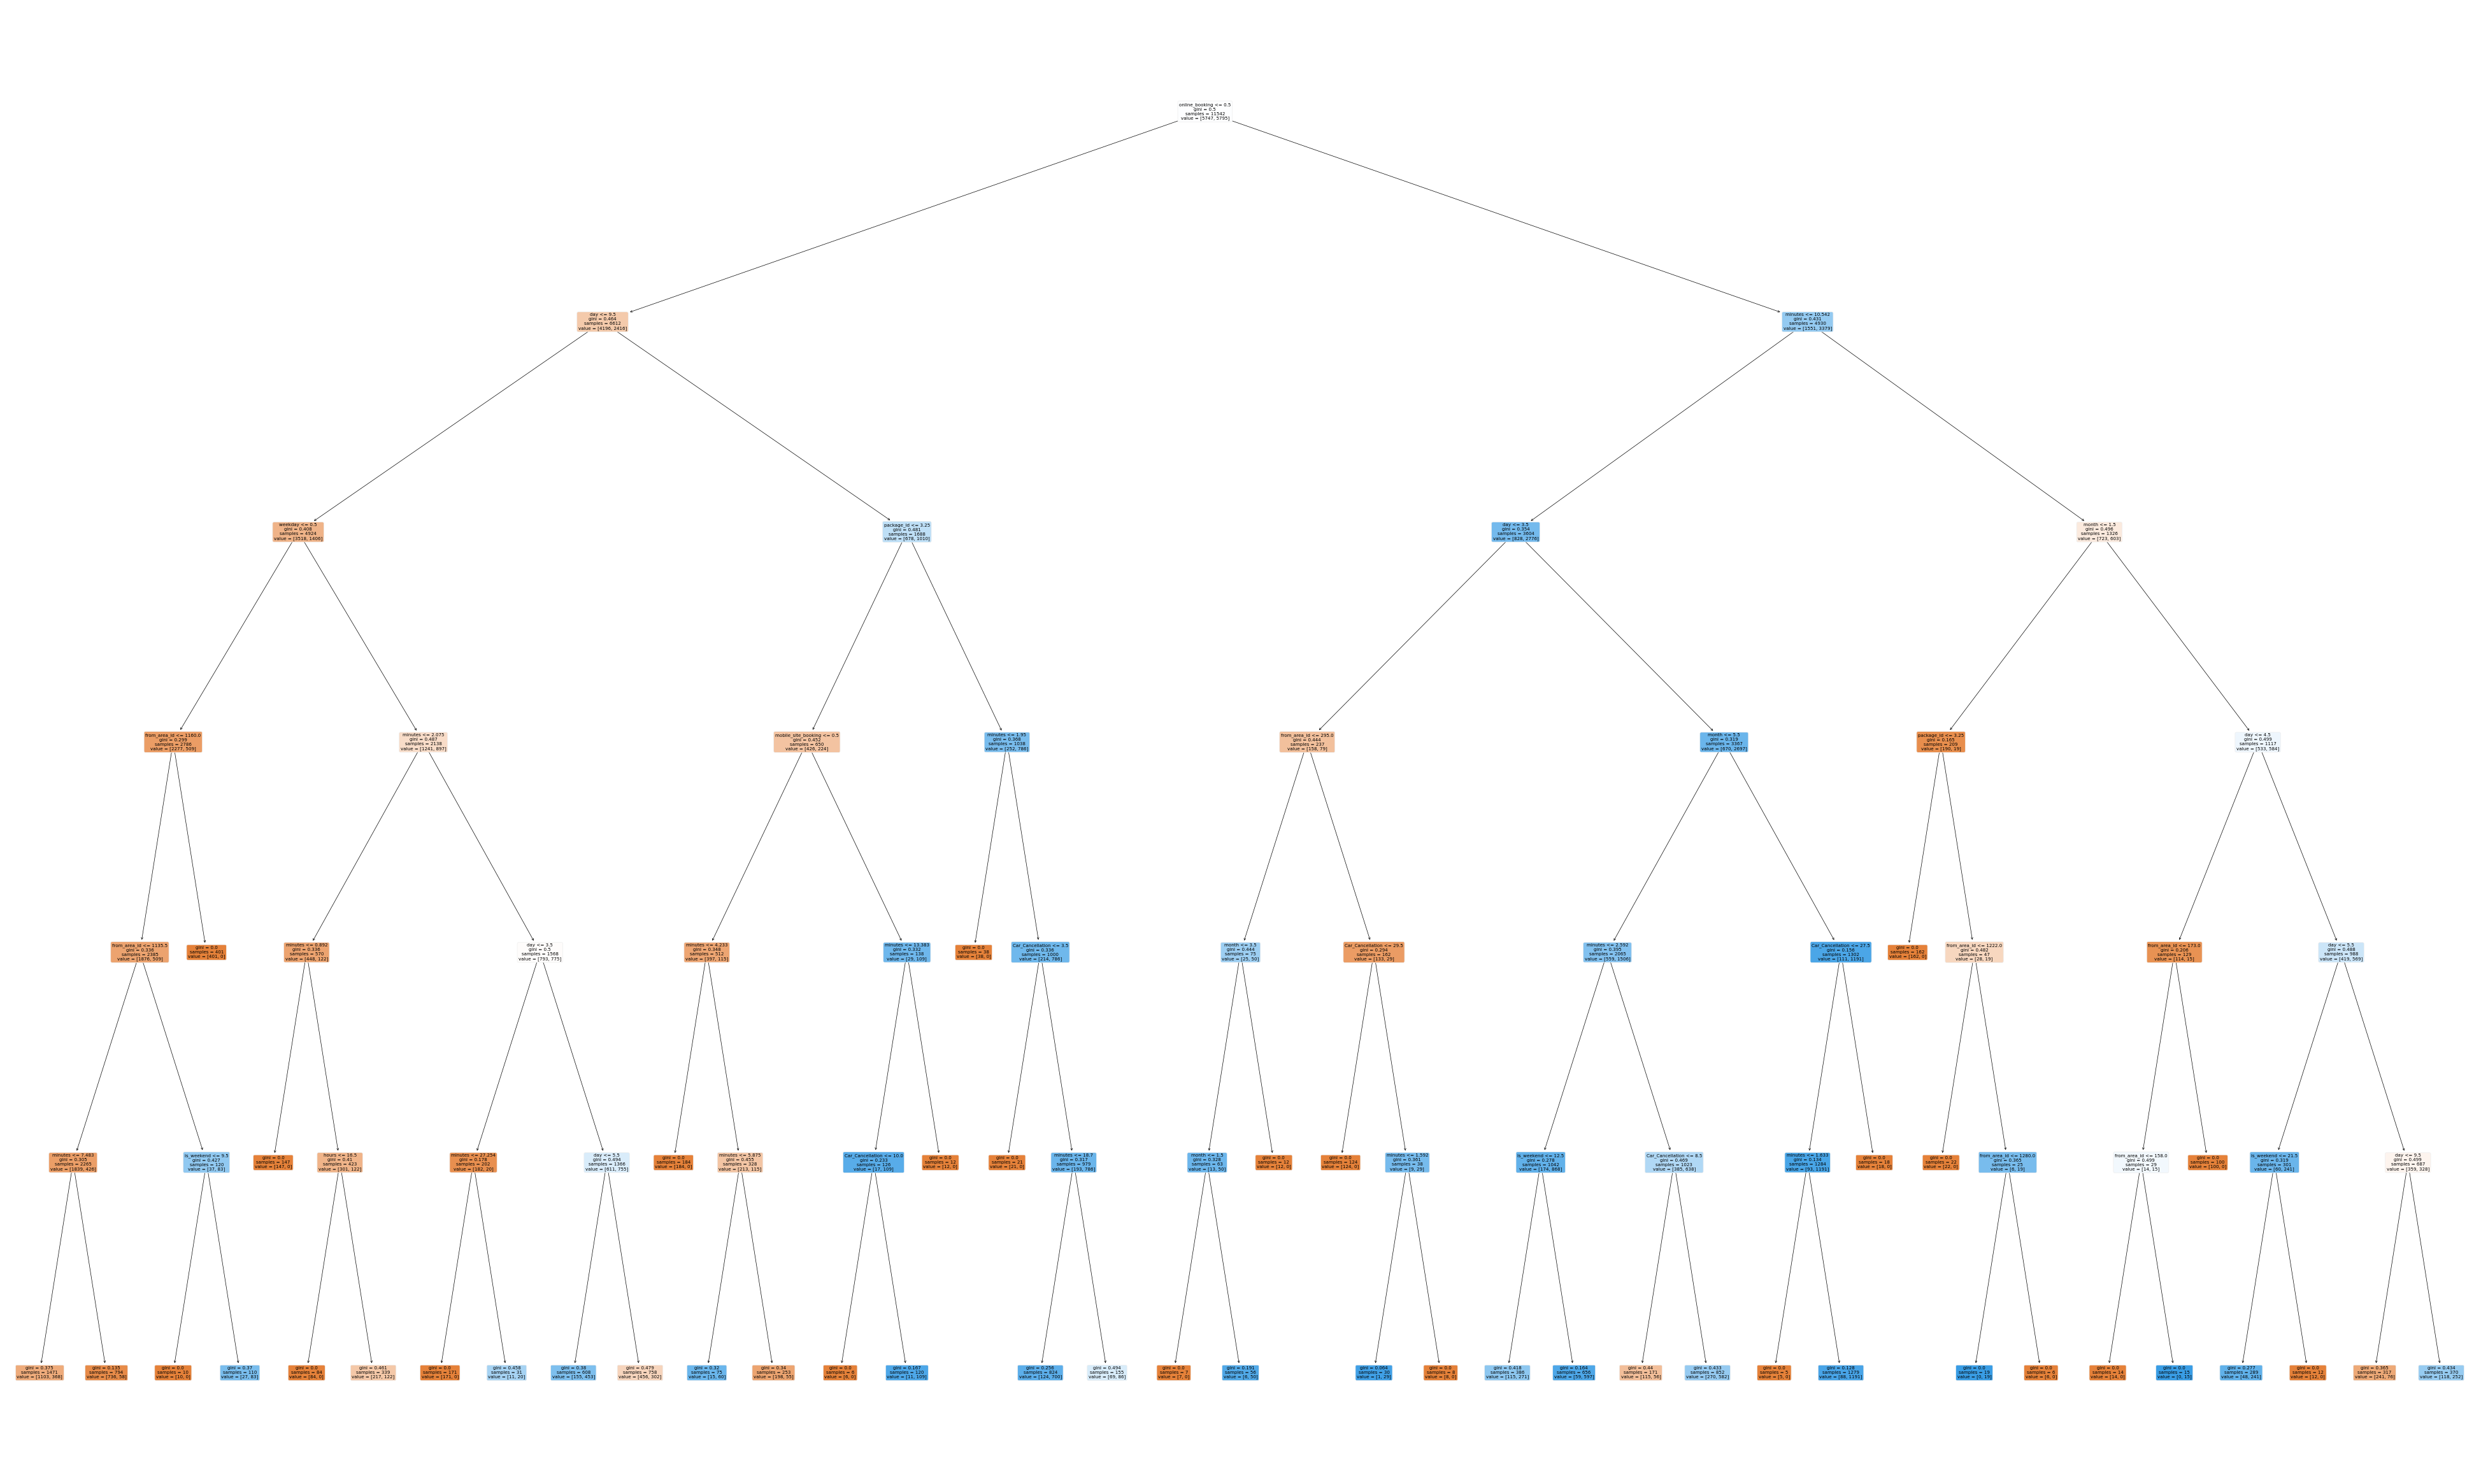

In [143]:
plt.figure(figsize=(50,30))  # Adjust size for better readability
plot_tree(model_dt, feature_names=data3_balanced.columns,filled=True, rounded=True)
plt.show()

In [144]:
y_pred_dt = model_dt.predict_proba(x_test)[:,1]
fpr_dt,tpr_dt,_ = roc_curve(y_test,y_pred_dt)


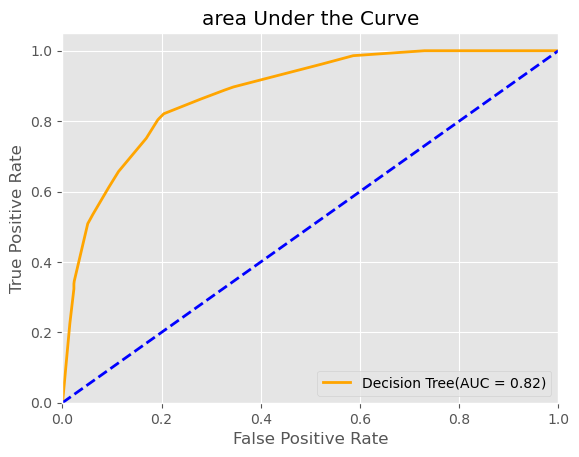

In [145]:

plt.figure(1)
lw=2
plt.plot(fpr_dt,tpr_dt,color='orange',lw=lw,label='Decision Tree(AUC = %0.2f)'%roc_auc_dt)
plt.plot([0,1],[0,1],color='blue',lw=lw,linestyle='--')

plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("area Under the Curve")
# plt.legend(loc="upper left")
plt.legend(loc="lower right")

In [146]:
predictions = model_dt.predict(x_test)
print(confusion_matrix(y_test,predictions))

[[1167  300]
 [ 254 1165]]


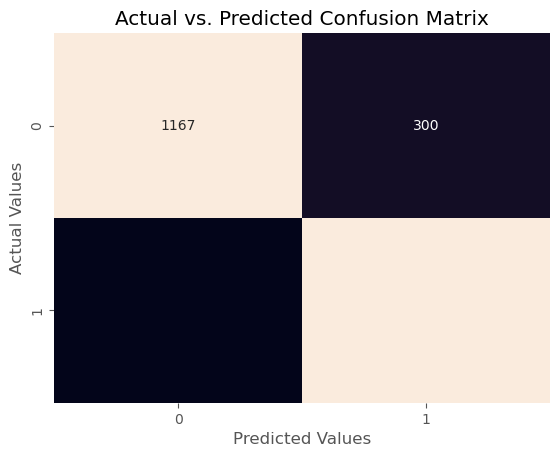

In [147]:
sns.heatmap(confusion_matrix(y_test,predictions), annot=True, fmt='d', cbar=False)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Actual vs. Predicted Confusion Matrix')
plt.show()

In [148]:
accuracy_score(y_test,predictions)

0.808038808038808

In [149]:
#KNN
knn = KNeighborsClassifier(n_neighbors=3)
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=25)
knn.fit(x_train,y_train)
pred = knn.predict(x_test)
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

[[1292  175]
 [   0 1419]]
              precision    recall  f1-score   support

           0       1.00      0.88      0.94      1467
           1       0.89      1.00      0.94      1419

    accuracy                           0.94      2886
   macro avg       0.95      0.94      0.94      2886
weighted avg       0.95      0.94      0.94      2886



In [150]:
accuracy_rate = []
error_rate = []
# May take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    score=cross_val_score(knn,x,data3_balanced['Car_Cancellation'],cv=10)
    accuracy_rate.append(score.mean())
    error_rate.append(1-score.mean())

Text(0, 0.5, 'Accuracy Rate')

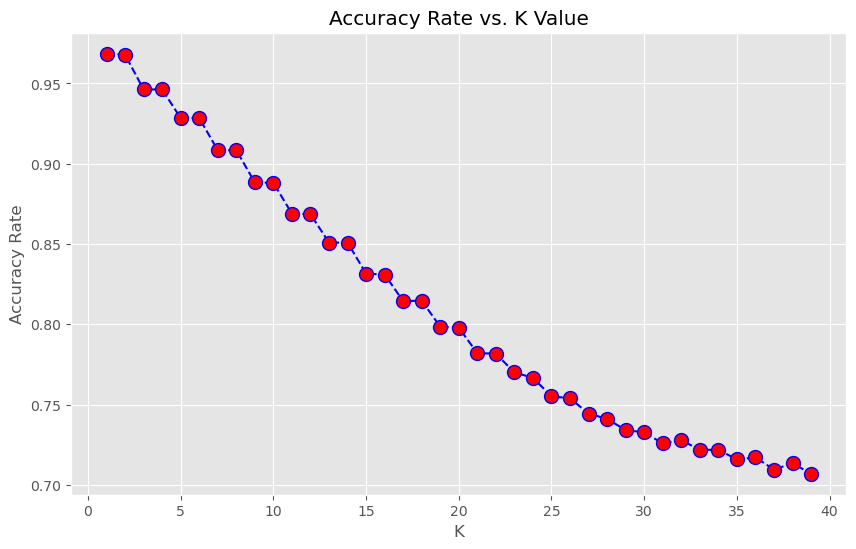

In [151]:
plt.figure(figsize=(10,6))
# plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
#         markerfacecolor='red', markersize=10)
# plt.title('Error Rate vs. K Value')
# plt.xlabel('K')
# plt.ylabel('Error Rate')

plt.plot(range(1,40),accuracy_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Accuracy Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy Rate')

In [152]:
knn = KNeighborsClassifier(n_neighbors=10)

knn.fit(x_train,y_train)
pred = knn.predict(x_test)

print('WITH K=10')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=10


[[1121  346]
 [   0 1419]]


              precision    recall  f1-score   support

           0       1.00      0.76      0.87      1467
           1       0.80      1.00      0.89      1419

    accuracy                           0.88      2886
   macro avg       0.90      0.88      0.88      2886
weighted avg       0.90      0.88      0.88      2886



In [153]:
knn = KNeighborsClassifier(n_neighbors=30)

knn.fit(x_train,y_train)
pred = knn.predict(x_test)

print('WITH K=30')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=30


[[ 844  623]
 [ 139 1280]]


              precision    recall  f1-score   support

           0       0.86      0.58      0.69      1467
           1       0.67      0.90      0.77      1419

    accuracy                           0.74      2886
   macro avg       0.77      0.74      0.73      2886
weighted avg       0.77      0.74      0.73      2886



In [154]:
#naive bayes
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=25)
model = GaussianNB()

model.fit(xtrain, ytrain)
pred = model.predict(xtest)
print(pred[:150])

[0 0 0 0 0 1 1 0 1 1 0 1 1 0 0 0 0 1 0 0 1 1 0 0 0 0 1 0 1 0 1 0 1 0 1 0 1
 0 0 1 1 1 0 0 1 1 1 0 1 0 0 1 1 1 0 0 0 1 1 1 1 1 0 0 0 1 1 0 0 0 1 0 1 1
 1 1 1 0 1 0 1 0 0 0 1 0 1 1 0 1 0 0 0 1 0 0 0 0 1 1 0 1 1 0 1 0 0 1 0 0 0
 0 0 1 1 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 1 0 0 0 1 0 1 1 1 1 0 1 0 0 0 0
 1 1]


[]

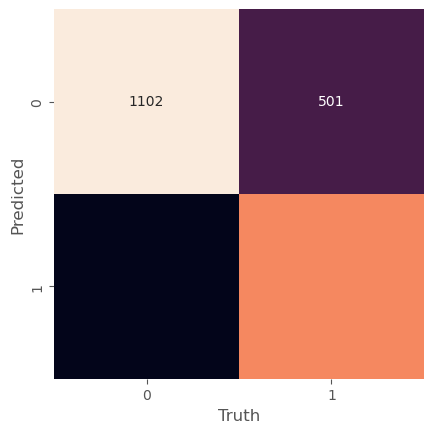

In [155]:
mat = confusion_matrix(pred, ytest)
names = np.unique(pred)
sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=names, yticklabels=names)
plt.xlabel('Truth')
plt.ylabel('Predicted')
plt.plot()

In [156]:
y_pred = pred
y_act = ytest
print(metrics.confusion_matrix(pred,ytest))
print(metrics.classification_report(pred, ytest))

[[1102  501]
 [ 365  918]]
              precision    recall  f1-score   support

           0       0.75      0.69      0.72      1603
           1       0.65      0.72      0.68      1283

    accuracy                           0.70      2886
   macro avg       0.70      0.70      0.70      2886
weighted avg       0.70      0.70      0.70      2886



In [157]:
#LOGISTICS REGRESSION
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=25)
standard_Scaler=StandardScaler()
x_train = standard_Scaler.fit_transform(x_train)
x_test = standard_Scaler.transform(x_test)
log_reg=LogisticRegression(random_state=0)
log_reg.fit(x_train,y_train)

LogisticRegression(random_state=0)

In [158]:

y_pred=log_reg.predict(x_test)
conf_matrix = confusion_matrix(y_test,y_pred)

Accuracy:  0.700970200970201
Precision:  0.7008670520231214
Recall:  0.6835799859055673


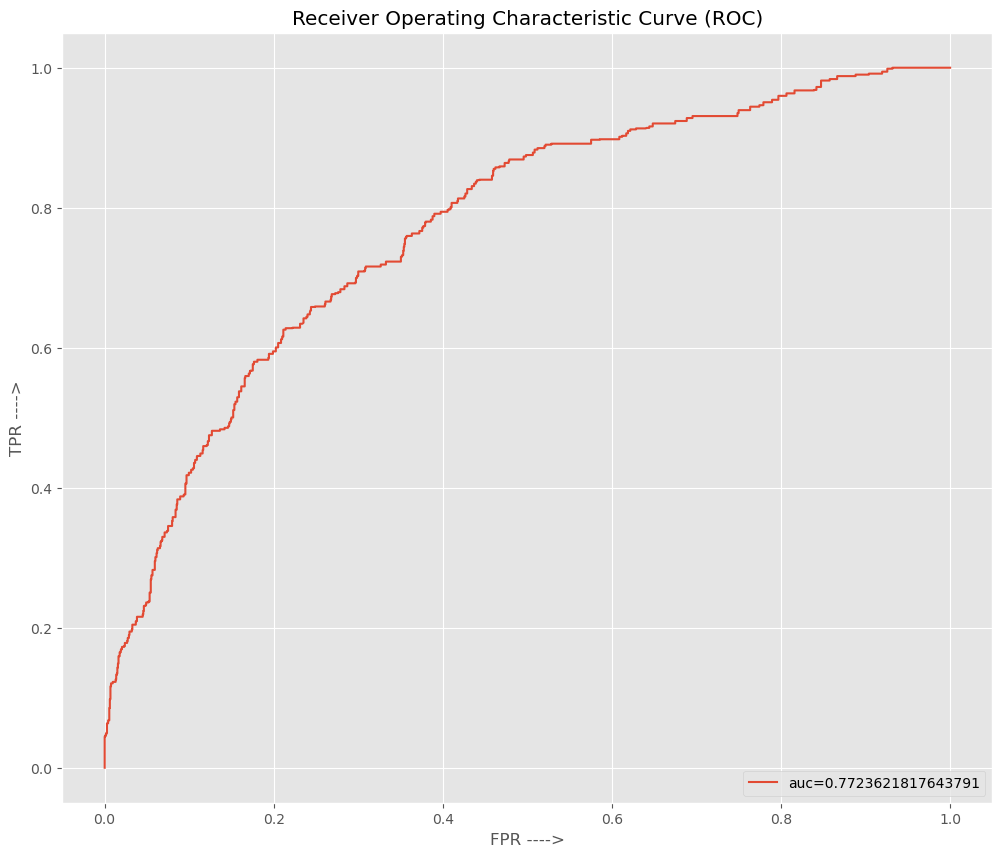

In [159]:
print("Accuracy: ", metrics.accuracy_score(y_test,y_pred))
print("Precision: ", metrics.precision_score(y_test,y_pred))
print("Recall: ", metrics.recall_score(y_test,y_pred))
y_pred_proba = log_reg.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.figure(figsize=(12,10))
plt.plot(fpr,tpr,label="auc="+str(auc))
plt.legend(loc=4)
plt.title("Receiver Operating Characteristic Curve (ROC)")
plt.xlabel("FPR ---->")
plt.ylabel("TPR ---->")
plt.show()

For my final data analysis results:

Data1: I used a Decision Tree model with the following configuration: DecisionTreeClassifier(random_state=1, max_depth=8, criterion='entropy').
Data2: I applied Logistic Regression with the following configuration: LogisticRegression(random_state=0).
Data3: I used a Decision Tree model with this configuration: DecisionTreeClassifier(random_state=1, max_depth=6).
Please consider that I am new to machine learning.